# project on spotify
## Context
Why do we like some songs more than others? Is there something about a song that pleases out subconscious, making us listening to it on repeat? To understand this I collected various attributes from a selection of songs available in the Spotify's playlist "All out ..s" starting from the 50s up to the newly ended 10s. Can you find the secret sauce to make a song popular?
Content
This data repo contains 7 datasets (.csv files), each representing a Spotify's "All out ..s" type of playlist. Those playlists collect the most popular/iconic songs from the decade. For each song, a set of attributes have been reported in order to perform some data analysis. The attributes have been scraped from this amazing website. In particular, according to the website the attributes are:
•	top genre: genre of the song
•	year: year of the song (due to re-releases, the year might not correspond to the release year of the original song)
•	bpm(beats per minute): beats per minute
•	nrgy(energy): energy of a song, the higher the value the more energetic the song is
•	dnce(danceability): the higher the value, the easier it is to dance to this song.
•	dB(loudness): the higher the value, the louder the song.
•	live(liveness): the higher the value, the more likely the song is a live recording.
•	val(valence): the higher the value, the more positive mood for the song.
•	dur(duration): the duration of the song.
•	acous(acousticness): the higher the value the more acoustic the song is.
•	spch(speechiness): the higher the value the more spoken word the song contains.
•	pop(popularity): the higher the value the more popular the song is.


# Step1. Prepare problem
In this first step we gonna load the needed libraries and load our datasets

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import os
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#load 7 CSV files
df_1950=pd.read_csv('datasets_492577_915991_1950.csv')
df_1960=pd.read_csv('datasets_492577_915991_1960.csv')
df_1970=pd.read_csv('datasets_492577_915991_1970.csv')
df_1980=pd.read_csv('datasets_492577_915991_1980.csv')
df_1990=pd.read_csv('datasets_492577_915991_1990.csv')
df_2000=pd.read_csv('datasets_492577_915991_2000.csv')
df_2010=pd.read_csv('datasets_492577_915991_2010.csv')

# Step 2. Summarize Data
a) Descriptive statistics
b) Data visualization

## Descriptive statistics

# Let's take a look at decade 1950

In [3]:
nRowsRead=1000
nRow,nCol=df_1950.shape
print(f'There are {nRow} rows and {nCol} columns in df_1950')

There are 73 rows and 15 columns in df_1950


In [4]:
df_1950.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     73 non-null     object 
 1   title      72 non-null     object 
 2   artist     72 non-null     object 
 3   top genre  60 non-null     object 
 4   year       72 non-null     float64
 5   bpm        72 non-null     float64
 6   nrgy       72 non-null     float64
 7   dnce       72 non-null     float64
 8   dB         72 non-null     float64
 9   live       72 non-null     float64
 10  val        72 non-null     float64
 11  dur        72 non-null     float64
 12  acous      72 non-null     float64
 13  spch       72 non-null     float64
 14  pop        72 non-null     float64
dtypes: float64(11), object(4)
memory usage: 8.7+ KB


In [5]:
#let's change year to object since we plan to transform the year into a categorical variable
convert_dict={'year':object}
df_1950=df_1950.astype(convert_dict)
print(df_1950.dtypes)

Number        object
title         object
artist        object
top genre     object
year          object
bpm          float64
nrgy         float64
dnce         float64
dB           float64
live         float64
val          float64
dur          float64
acous        float64
spch         float64
pop          float64
dtype: object


In [6]:
df_1950.isnull().sum()

Number        0
title         1
artist        1
top genre    13
year          1
bpm           1
nrgy          1
dnce          1
dB            1
live          1
val           1
dur           1
acous         1
spch          1
pop           1
dtype: int64

In [7]:
df_1950.describe()

bpm       nrgy       dnce         dB       live        val  \
count   72.000000  72.000000  72.000000  72.000000  72.000000  72.000000   
mean   111.527778  34.916667  50.819444 -11.555556  18.277778  57.652778   
std     28.056268  17.532063  14.494609   3.410377  12.040100  25.257078   
min     72.000000   6.000000  18.000000 -18.000000   2.000000  10.000000   
25%     89.250000  20.750000  40.500000 -15.000000  10.750000  35.500000   
50%    108.000000  33.500000  51.500000 -10.000000  13.000000  57.500000   
75%    128.500000  44.250000  59.000000  -9.000000  24.250000  79.250000   
max    195.000000  97.000000  88.000000  -2.000000  72.000000  99.000000   

              dur       acous       spch        pop  
count   72.000000   72.000000  72.000000  72.000000  
mean   149.625000   73.069444   4.125000  40.930556  
std     22.662519   20.266066   1.727471  10.411703  
min     98.000000    4.000000   3.000000  26.000000  
25%    135.000000   62.500000   3.000000  33.000000  
50%    148.500000   79.000000   3.000000  39.000000  
75%    163.250000   87.250000   4.000000  48.000000  
max    214.000000  100.000000  11.000000  72.000000

In [8]:
#Let's calculate the correlations between attributes
df_1950.corr(method='pearson')

bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.210807  0.097387  0.091281  0.232008  0.390130 -0.204675   
nrgy   0.210807  1.000000  0.342519  0.686822  0.298165  0.676696 -0.308803   
dnce   0.097387  0.342519  1.000000  0.277740 -0.026422  0.628046 -0.378472   
dB     0.091281  0.686822  0.277740  1.000000  0.153707  0.447230 -0.366656   
live   0.232008  0.298165 -0.026422  0.153707  1.000000  0.206149 -0.099443   
val    0.390130  0.676696  0.628046  0.447230  0.206149  1.000000 -0.447504   
dur   -0.204675 -0.308803 -0.378472 -0.366656 -0.099443 -0.447504  1.000000   
acous  0.049154 -0.577466 -0.208288 -0.282286 -0.134342 -0.370018  0.086537   
spch   0.179375  0.302630  0.414353  0.045424  0.196042  0.343834 -0.036921   
pop    0.011651 -0.088842 -0.128597 -0.101853 -0.007596 -0.000950  0.205943   

          acous      spch       pop  
bpm    0.049154  0.179375  0.011651  
nrgy  -0.577466  0.302630 -0.088842  
dnce  -0.208288  0.414353 -0.128597  
dB    -0.282286  0.045424 -0.101853  
live  -0.134342  0.196042 -0.007596  
val   -0.370018  0.343834 -0.000950  
dur    0.086537 -0.036921  0.205943  
acous  1.000000 -0.102036  0.021116  
spch  -0.102036  1.000000  0.092894  
pop    0.021116  0.092894  1.000000

## comments on the correlation
nrgy is highly correlated to dB, val and acous
dnce is highly correlated to val
dB is highly correlated to nrgy

When it will come to feature selection we will youse the Variance Inflation Factor to select the best features. The correlation show us that the correlated variables might not be used together in the model.

In [9]:
#Let's take a look at the skewness
df_1950.skew()

year    -0.862647
bpm      0.756974
nrgy     0.744346
dnce    -0.003210
dB      -0.195530
live     2.113379
val     -0.101155
dur      0.375119
acous   -1.380218
spch     2.044189
pop      0.668502
dtype: float64

## Interpret the skewness 
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: dnce, dB, val, dur

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed:bpm, nrgy,pop

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: live,acous,spch

In [10]:
import seaborn as sns
sns.set()

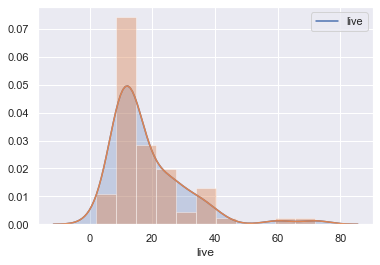

In [11]:
sns.kdeplot(df_1950['live'], shade=True)
sns.distplot(df_1950['live']);

In [12]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

## Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


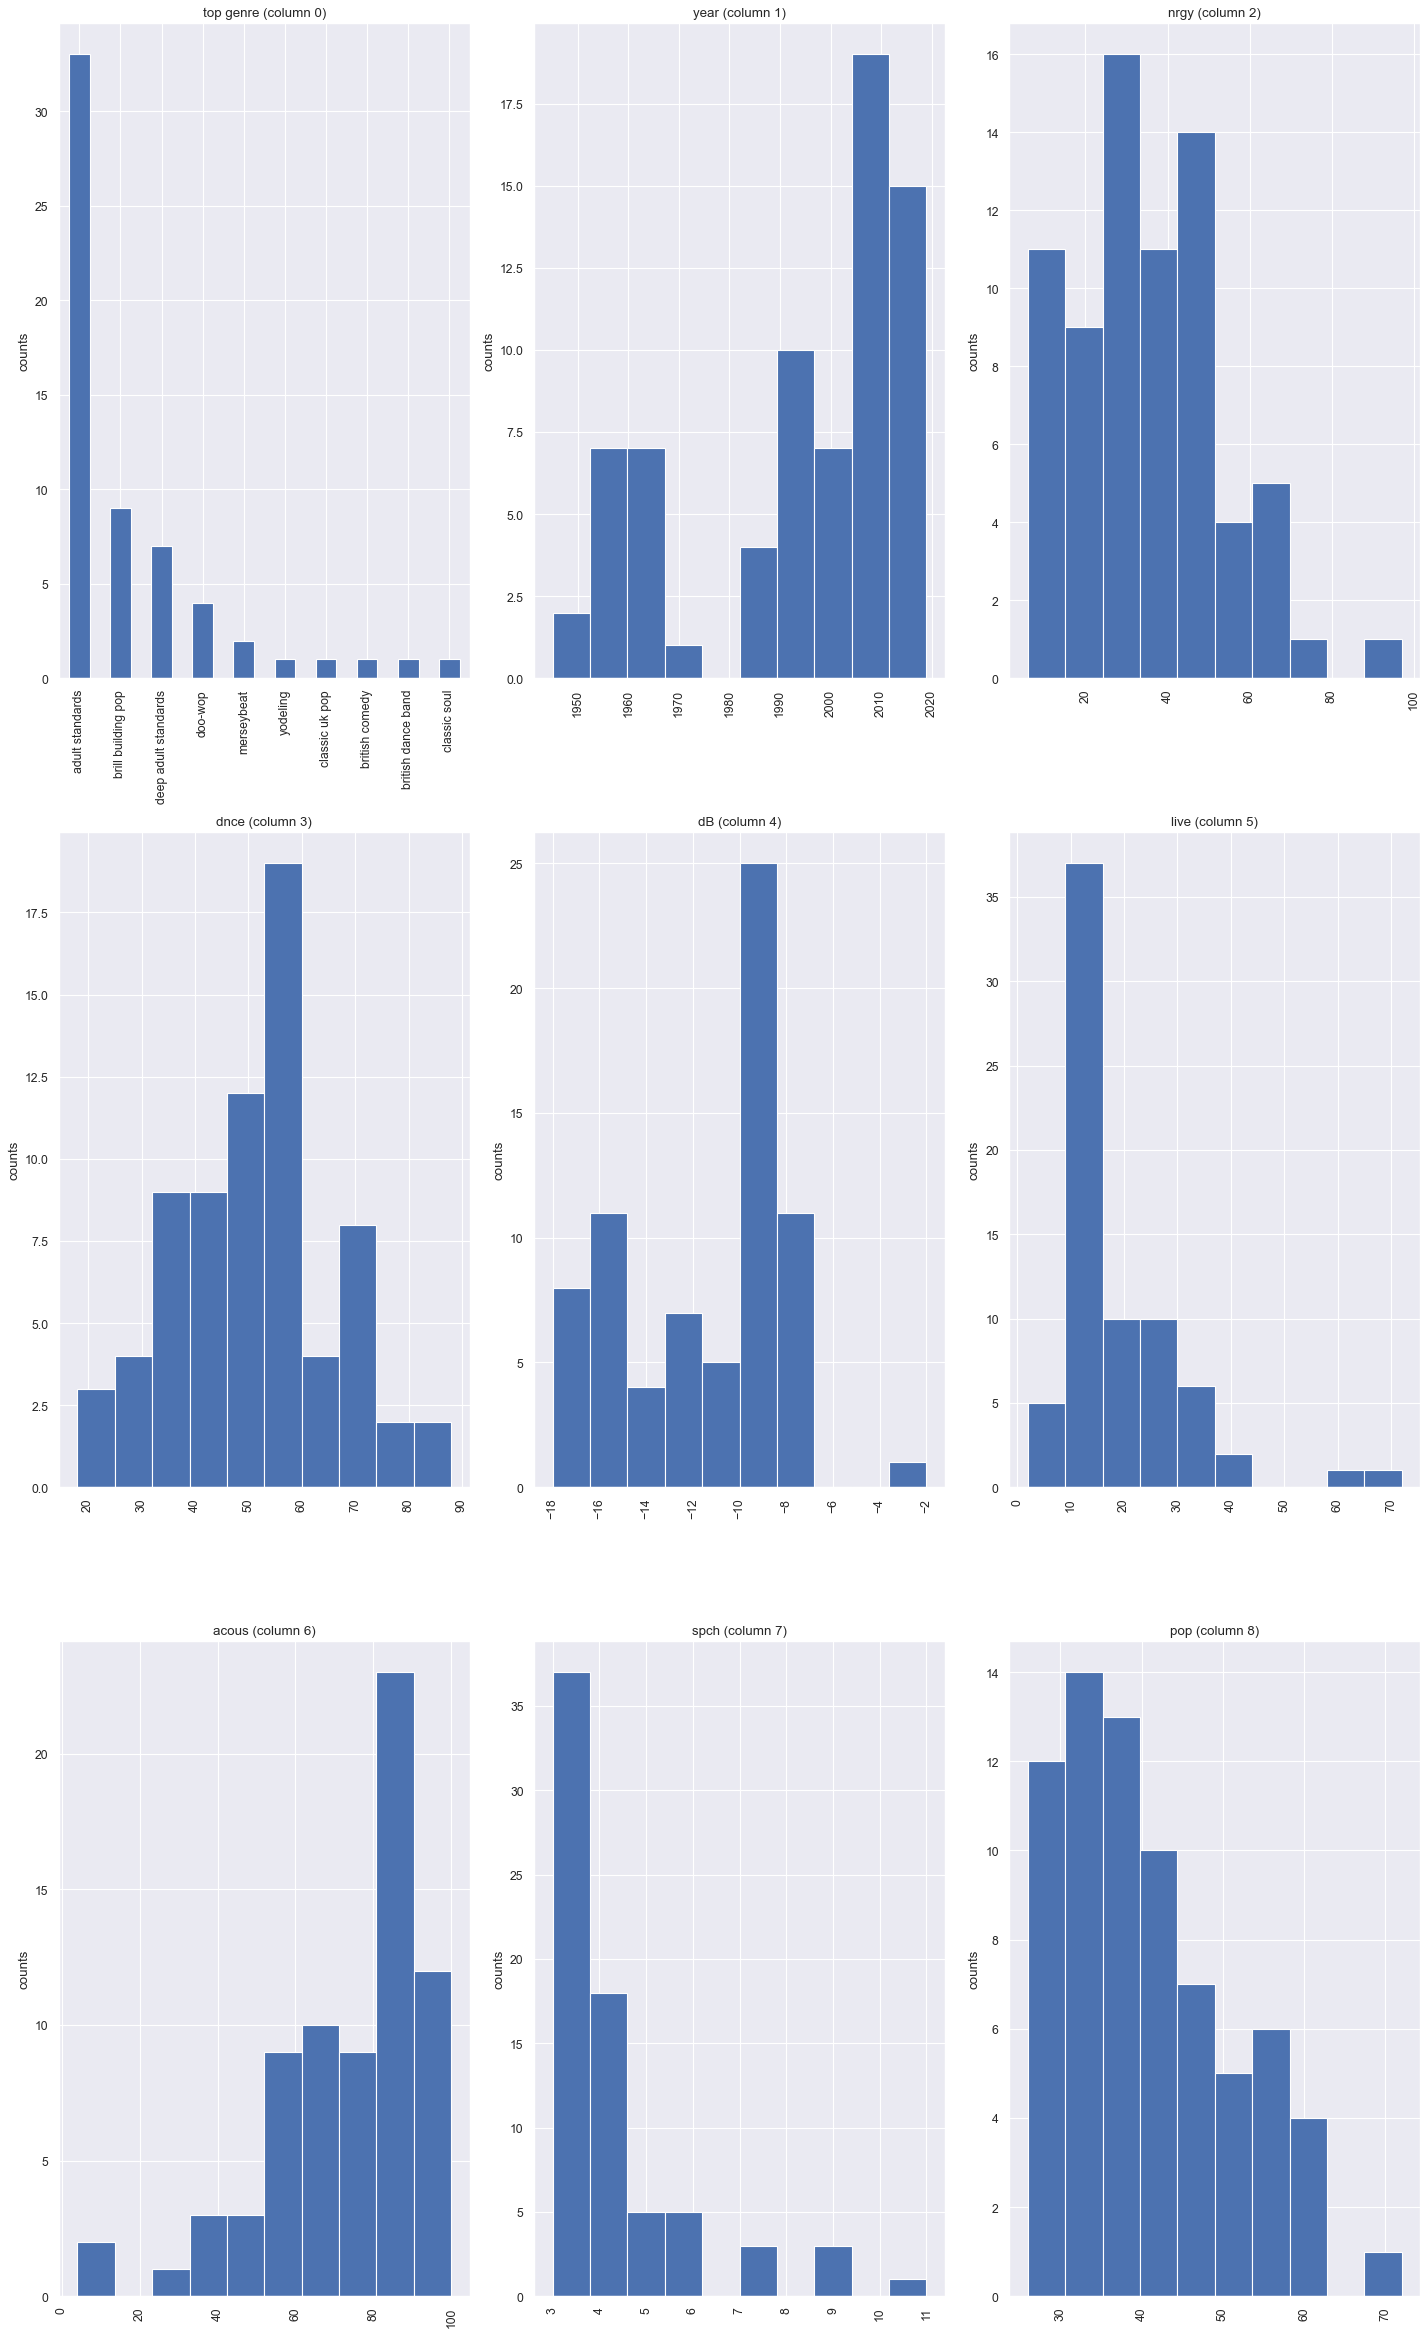

In [15]:
plotPerColumnDistribution(df_1950,nGraphShown=15,nGraphPerRow=3)

## correlation matrix

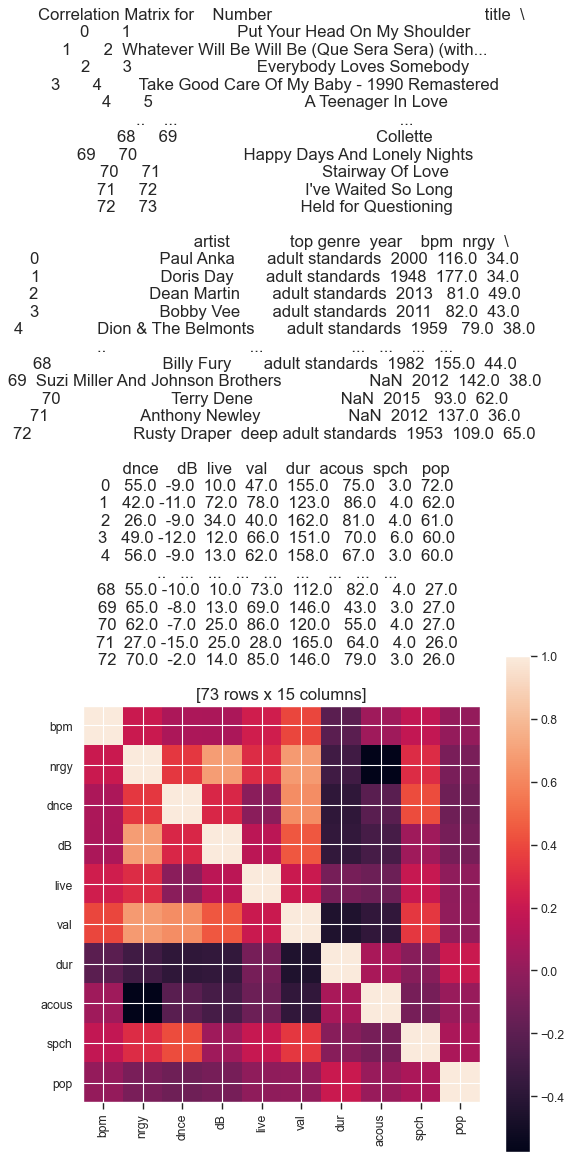

In [16]:
plotCorrelationMatrix(df_1950, 8)

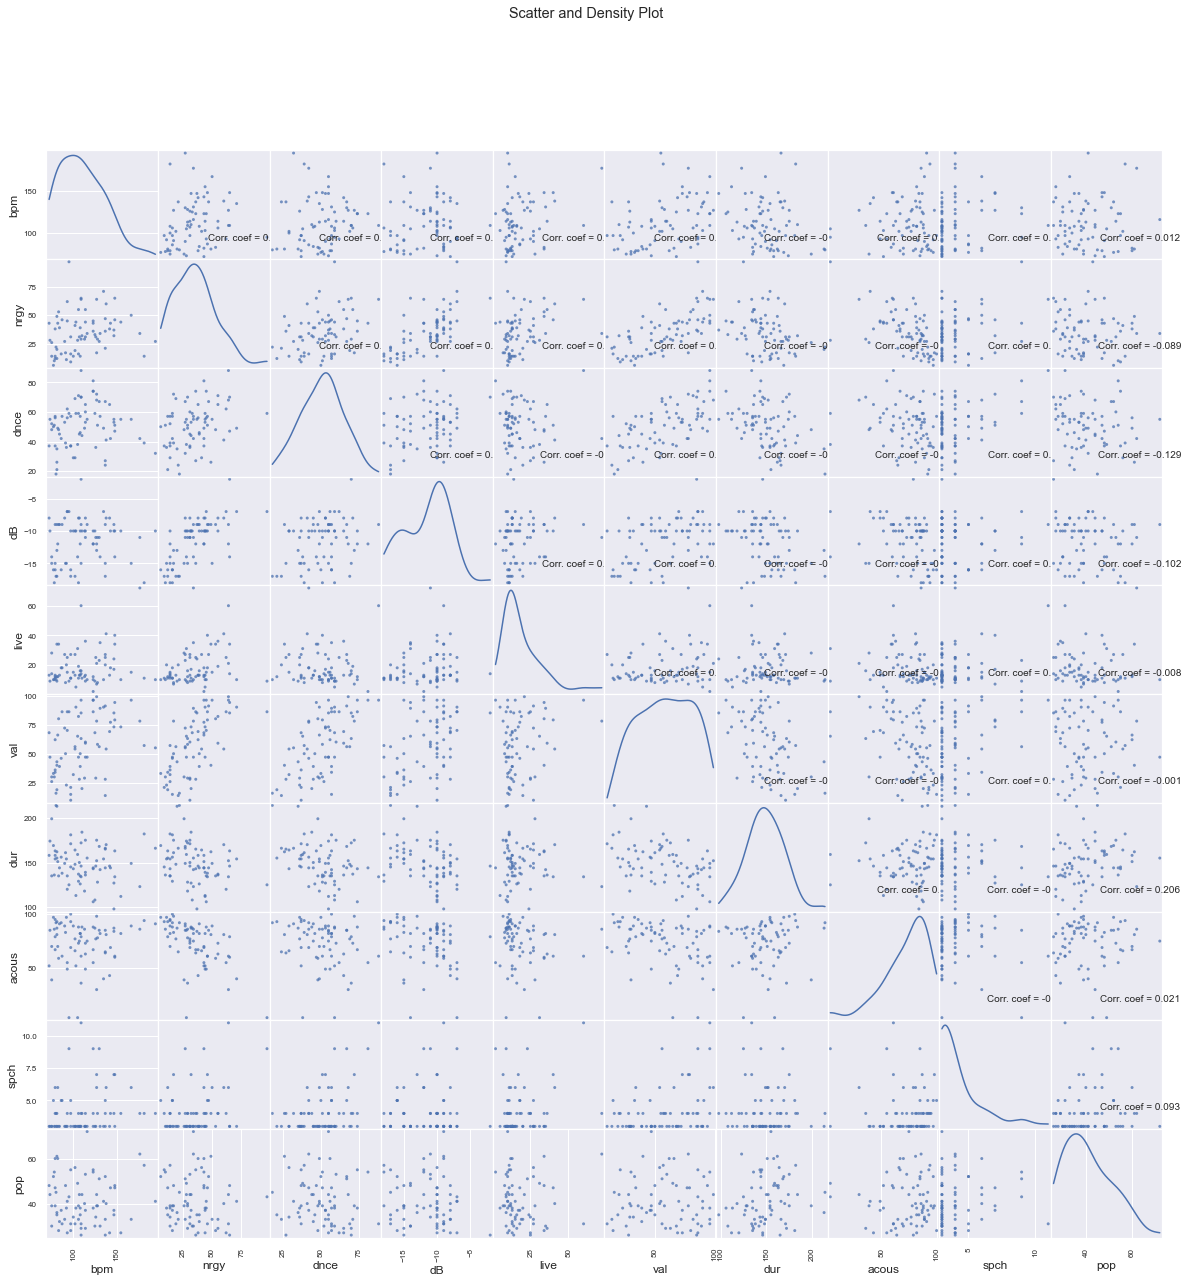

In [17]:
#Scatter and density plots
plotScatterMatrix(df_1950, plotSize=20, textSize=10)

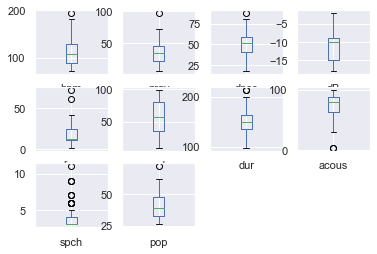

In [18]:
from pandas import read_csv
from matplotlib import pyplot
#filename='datasets_492577_915991_1950.csv'
#names=['bpm','nrgy','dnce','db','live','val','dur','acous','spch','pop']
#data_50=read_csv(filename,names=names)
df_1950[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']].plot(kind='box',subplots=True,layout=(3,4),sharex=False,sharey=False)
pyplot.show()

# let's take a look at decade 1960

In [19]:
nRowsRead=1000
nRow,nCol=df_1960.shape
print(f'There are {nRow} rows and {nCol} columns in df_1960')

There are 97 rows and 15 columns in df_1960


In [20]:
df_1960.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     97 non-null     object 
 1   title      96 non-null     object 
 2   artist     96 non-null     object 
 3   top genre  96 non-null     object 
 4   year       96 non-null     float64
 5   bpm        96 non-null     float64
 6   nrgy       96 non-null     float64
 7   dnce       96 non-null     float64
 8   dB         96 non-null     float64
 9   live       96 non-null     float64
 10  val        96 non-null     float64
 11  dur        96 non-null     float64
 12  acous      96 non-null     float64
 13  spch       96 non-null     float64
 14  pop        96 non-null     float64
dtypes: float64(11), object(4)
memory usage: 11.5+ KB


In [21]:
#let's change year to object since we plan to transform the year into a categorical variable
convert_dict={'year':object}
df_1960=df_1960.astype(convert_dict)
print(df_1960.dtypes)

Number        object
title         object
artist        object
top genre     object
year          object
bpm          float64
nrgy         float64
dnce         float64
dB           float64
live         float64
val          float64
dur          float64
acous        float64
spch         float64
pop          float64
dtype: object


In [22]:
df_1960.isnull().sum()

Number       0
title        1
artist       1
top genre    1
year         1
bpm          1
nrgy         1
dnce         1
dB           1
live         1
val          1
dur          1
acous        1
spch         1
pop          1
dtype: int64

In [23]:
df_1960.describe()

bpm       nrgy       dnce         dB       live        val  \
count   96.000000  96.000000  96.000000  96.000000  96.000000  96.000000   
mean   117.604167  52.197917  51.291667 -10.656250  19.322917  57.354167   
std     27.042843  21.361362  12.569735   3.854807  15.671291  23.769498   
min     63.000000   6.000000  20.000000 -24.000000   4.000000   6.000000   
25%     98.000000  39.000000  43.750000 -13.000000   9.000000  41.500000   
50%    116.500000  51.500000  51.500000 -10.000000  14.000000  56.500000   
75%    131.250000  68.000000  61.000000  -8.000000  24.000000  75.500000   
max    199.000000  99.000000  79.000000  -1.000000  90.000000  97.000000   

              dur      acous       spch        pop  
count   96.000000  96.000000  96.000000  96.000000  
mean   205.697917  45.645833   4.739583  53.572917  
std     83.546535  28.277192   3.434331  11.932922  
min    122.000000   0.000000   2.000000  30.000000  
25%    152.750000  23.000000   3.000000  44.750000  
50%    178.500000  43.500000   4.000000  52.000000  
75%    210.250000  68.500000   5.000000  60.250000  
max    466.000000  99.000000  31.000000  82.000000

In [24]:
df_1960.corr()

bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.273193 -0.018547  0.095934  0.056886  0.203068 -0.067861   
nrgy   0.273193  1.000000  0.178941  0.636543  0.109076  0.513687 -0.245060   
dnce  -0.018547  0.178941  1.000000  0.058955 -0.091915  0.538868 -0.270411   
dB     0.095934  0.636543  0.058955  1.000000  0.027417  0.254960 -0.371790   
live   0.056886  0.109076 -0.091915  0.027417  1.000000  0.067765 -0.088000   
val    0.203068  0.513687  0.538868  0.254960  0.067765  1.000000 -0.277126   
dur   -0.067861 -0.245060 -0.270411 -0.371790 -0.088000 -0.277126  1.000000   
acous -0.414716 -0.504399 -0.106735 -0.284619 -0.042995 -0.297355  0.157279   
spch   0.083430  0.154956  0.026406 -0.077449  0.064948  0.049368  0.014214   
pop   -0.025353 -0.101871  0.074877  0.101168 -0.180168 -0.066039 -0.050928   

          acous      spch       pop  
bpm   -0.414716  0.083430 -0.025353  
nrgy  -0.504399  0.154956 -0.101871  
dnce  -0.106735  0.026406  0.074877  
dB    -0.284619 -0.077449  0.101168  
live  -0.042995  0.064948 -0.180168  
val   -0.297355  0.049368 -0.066039  
dur    0.157279  0.014214 -0.050928  
acous  1.000000  0.078817 -0.020605  
spch   0.078817  1.000000 -0.224151  
pop   -0.020605 -0.224151  1.000000

## comment on correlation
bpm is moderately correlated to accous, 
nrgy is highly correlated to dB,val and acous
dnce ishighly correlated to val

When it will come to feature selection we will youse the Variance Inflation Factor to select the best features. The correlation show us that the correlated variables might not be used together in the model.

In [25]:
#let's look at the skewness
df_1960.skew()

year     0.849663
bpm      0.467059
nrgy    -0.110852
dnce    -0.393561
dB      -0.703540
live     2.290274
val     -0.094354
dur      1.804432
acous    0.152381
spch     5.149754
pop      0.463614
dtype: float64

## Interpret the skewness¶
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: bpm, nrgy, dnce, val, acous, pop

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed:dB

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: live, dur, spch

# Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


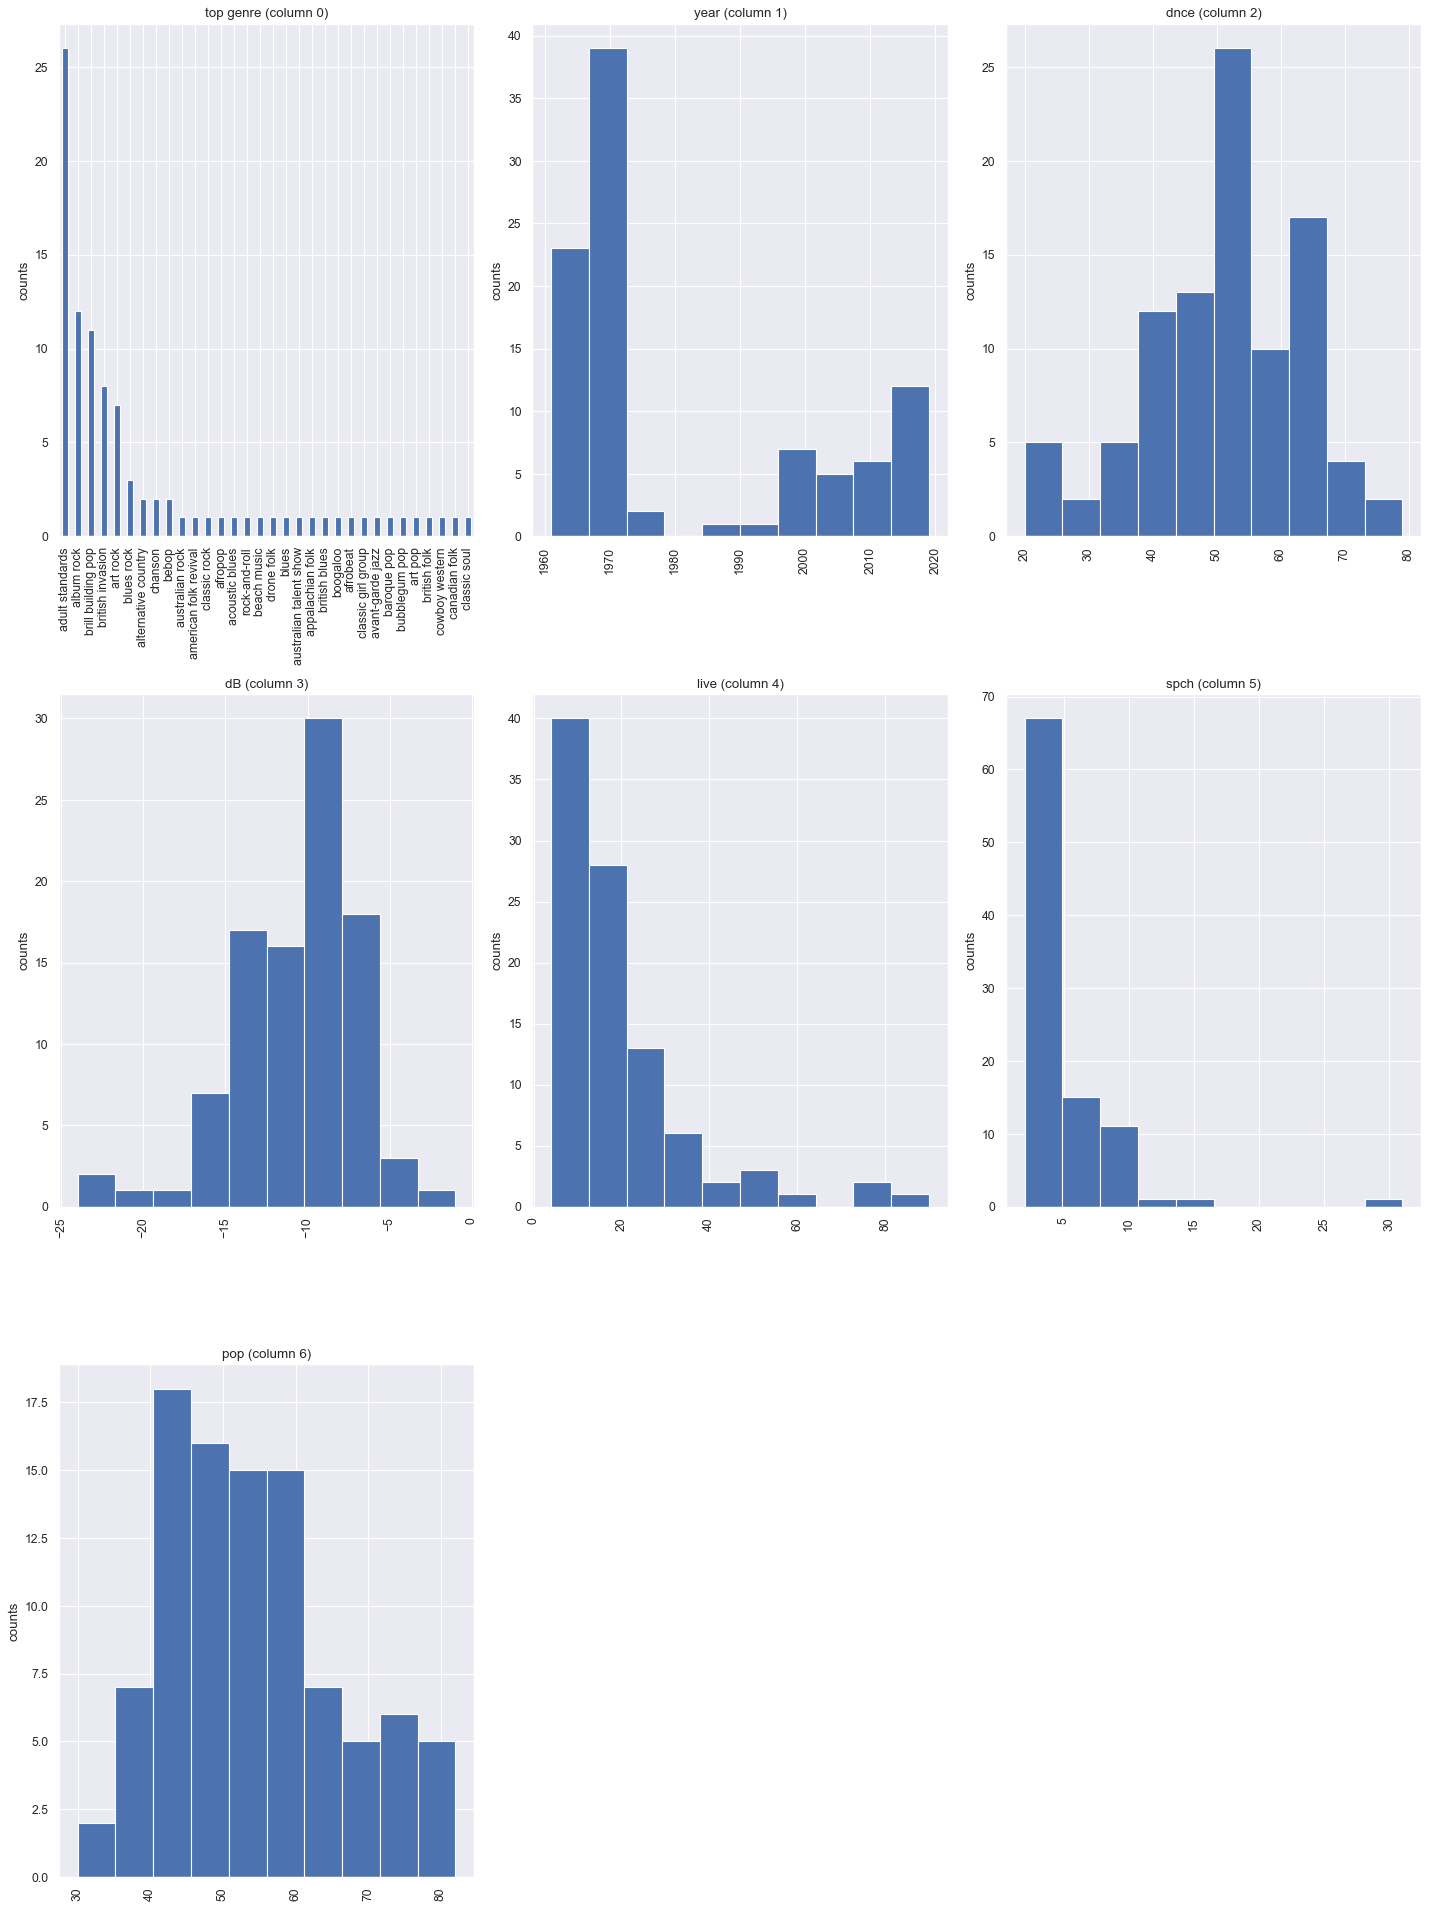

In [26]:
plotPerColumnDistribution(df_1960,nGraphShown=15,nGraphPerRow=3)

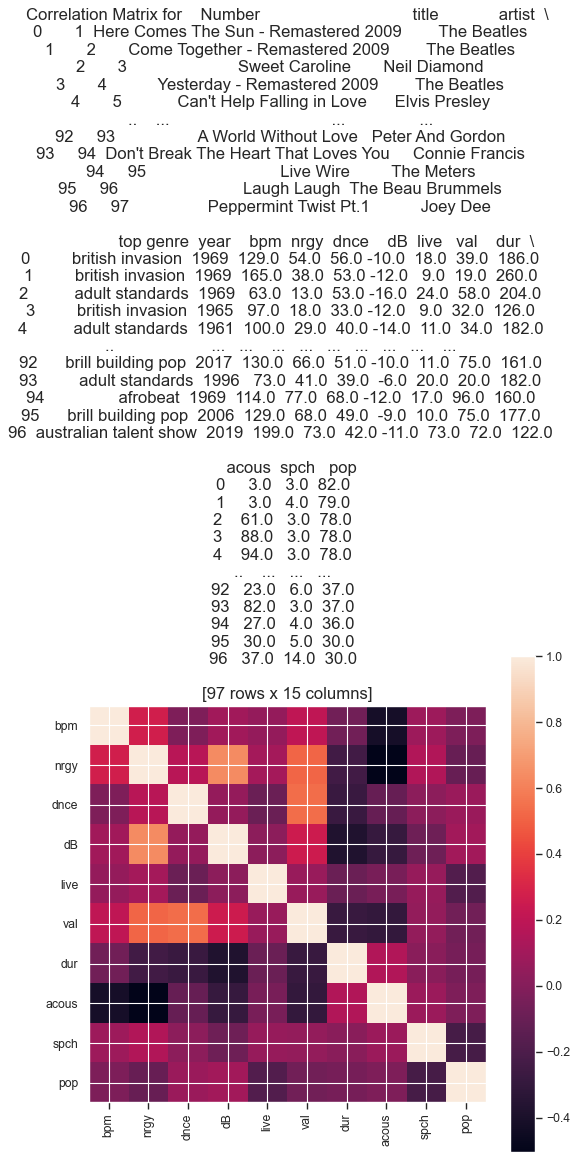

In [27]:
plotCorrelationMatrix(df_1960, 8)

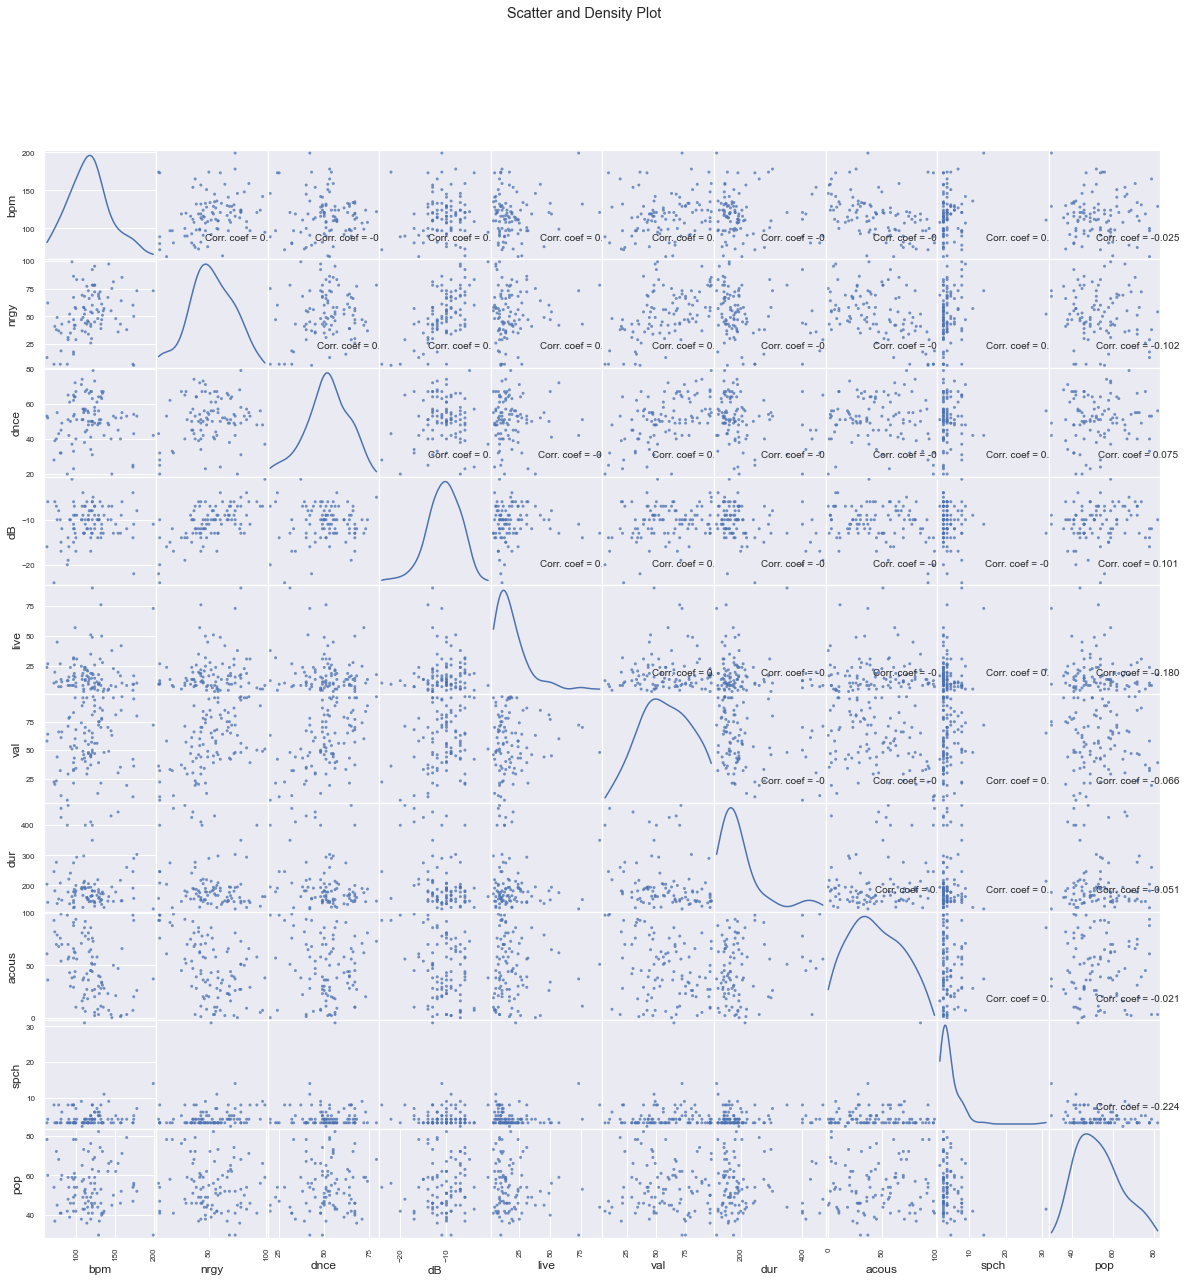

In [28]:
#Scatter and density plots
plotScatterMatrix(df_1960, plotSize=20, textSize=10)

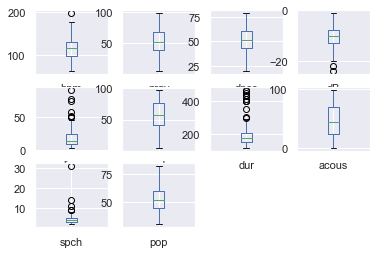

In [29]:
from pandas import read_csv
from matplotlib import pyplot
df_1960[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']].plot(kind='box',subplots=True,layout=(3,4))
pyplot.show()

# We will take a look at decade 70

In [30]:
nRowsRead=1000
nRow,nCol=df_1970.shape
print(f'There are {nRow} rows and {nCol} columns in df_1970')

There are 104 rows and 15 columns in df_1970


In [31]:
df_1970.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     104 non-null    object 
 1   title      103 non-null    object 
 2   artist     103 non-null    object 
 3   top genre  103 non-null    object 
 4   year       103 non-null    float64
 5   bpm        103 non-null    float64
 6   nrgy       103 non-null    float64
 7   dnce       103 non-null    float64
 8   dB         103 non-null    float64
 9   live       103 non-null    float64
 10  val        103 non-null    float64
 11  dur        103 non-null    float64
 12  acous      103 non-null    float64
 13  spch       103 non-null    float64
 14  pop        103 non-null    float64
dtypes: float64(11), object(4)
memory usage: 12.3+ KB


In [32]:
#let's change year to object since we plan to transform the year into a categorical variable
convert_dict={'year':object}
df_1970=df_1970.astype(convert_dict)
print(df_1970.dtypes)

Number        object
title         object
artist        object
top genre     object
year          object
bpm          float64
nrgy         float64
dnce         float64
dB           float64
live         float64
val          float64
dur          float64
acous        float64
spch         float64
pop          float64
dtype: object


In [33]:
df_1970.isnull().sum()

Number       0
title        1
artist       1
top genre    1
year         1
bpm          1
nrgy         1
dnce         1
dB           1
live         1
val          1
dur          1
acous        1
spch         1
pop          1
dtype: int64

In [34]:
df_1970.describe()

bpm        nrgy        dnce          dB        live         val  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean   120.941748   63.281553   56.815534   -8.980583   19.737864   63.368932   
std     23.421887   21.499848   14.570819    3.131061   13.325459   24.487288   
min     64.000000   13.000000   26.000000  -17.000000    4.000000    7.000000   
25%    106.000000   45.500000   45.500000  -11.000000   11.000000   45.500000   
50%    121.000000   68.000000   57.000000   -9.000000   14.000000   68.000000   
75%    135.500000   79.500000   68.500000   -7.000000   25.500000   83.000000   
max    199.000000   97.000000   83.000000   -4.000000   78.000000   98.000000   

              dur       acous        spch         pop  
count  103.000000  103.000000  103.000000  103.000000  
mean   232.728155   30.446602    4.766990   64.970874  
std     57.300069   26.559858    2.744706    9.528550  
min    116.000000    0.000000    3.000000   40.000000  
25%    198.500000    9.000000    3.000000   58.000000  
50%    221.000000   23.000000    4.000000   65.000000  
75%    267.000000   42.000000    5.000000   73.500000  
max    511.000000   94.000000   17.000000   84.000000

In [35]:
df_1970.corr()

bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.034785 -0.101238 -0.046106 -0.021001  0.040311  0.049925   
nrgy   0.034785  1.000000  0.351333  0.689220  0.111476  0.495702  0.018342   
dnce  -0.101238  0.351333  1.000000  0.109460 -0.051654  0.671959  0.004601   
dB    -0.046106  0.689220  0.109460  1.000000  0.124896  0.127647  0.029046   
live  -0.021001  0.111476 -0.051654  0.124896  1.000000  0.014330 -0.048295   
val    0.040311  0.495702  0.671959  0.127647  0.014330  1.000000 -0.175062   
dur    0.049925  0.018342  0.004601  0.029046 -0.048295 -0.175062  1.000000   
acous -0.124240 -0.612649 -0.327875 -0.284578 -0.106092 -0.436306 -0.123232   
spch   0.127585  0.432749  0.079077  0.332507  0.139310  0.005959 -0.129882   
pop   -0.072139 -0.116729  0.007517 -0.069646  0.026578 -0.159369  0.225697   

          acous      spch       pop  
bpm   -0.124240  0.127585 -0.072139  
nrgy  -0.612649  0.432749 -0.116729  
dnce  -0.327875  0.079077  0.007517  
dB    -0.284578  0.332507 -0.069646  
live  -0.106092  0.139310  0.026578  
val   -0.436306  0.005959 -0.159369  
dur   -0.123232 -0.129882  0.225697  
acous  1.000000 -0.323881 -0.036401  
spch  -0.323881  1.000000  0.094579  
pop   -0.036401  0.094579  1.000000

## Comments on correlation
nrgy is highly correlated with dB, with acous and moderately correlated with spch
dnce is highly correlated with val
val is moderately correlated with acous

In [36]:
# let's take a look at the skewness
df_1970.skew()

year     1.864485
bpm      0.316811
nrgy    -0.341140
dnce    -0.311308
dB      -0.510807
live     1.741276
val     -0.417419
dur      1.390715
acous    0.940675
spch     2.291205
pop     -0.124787
dtype: float64

## Interpret the skewness¶¶
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: bpm, nrgy, dnce, val, pop

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed:dB,acous

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: live, dur, spch

# Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


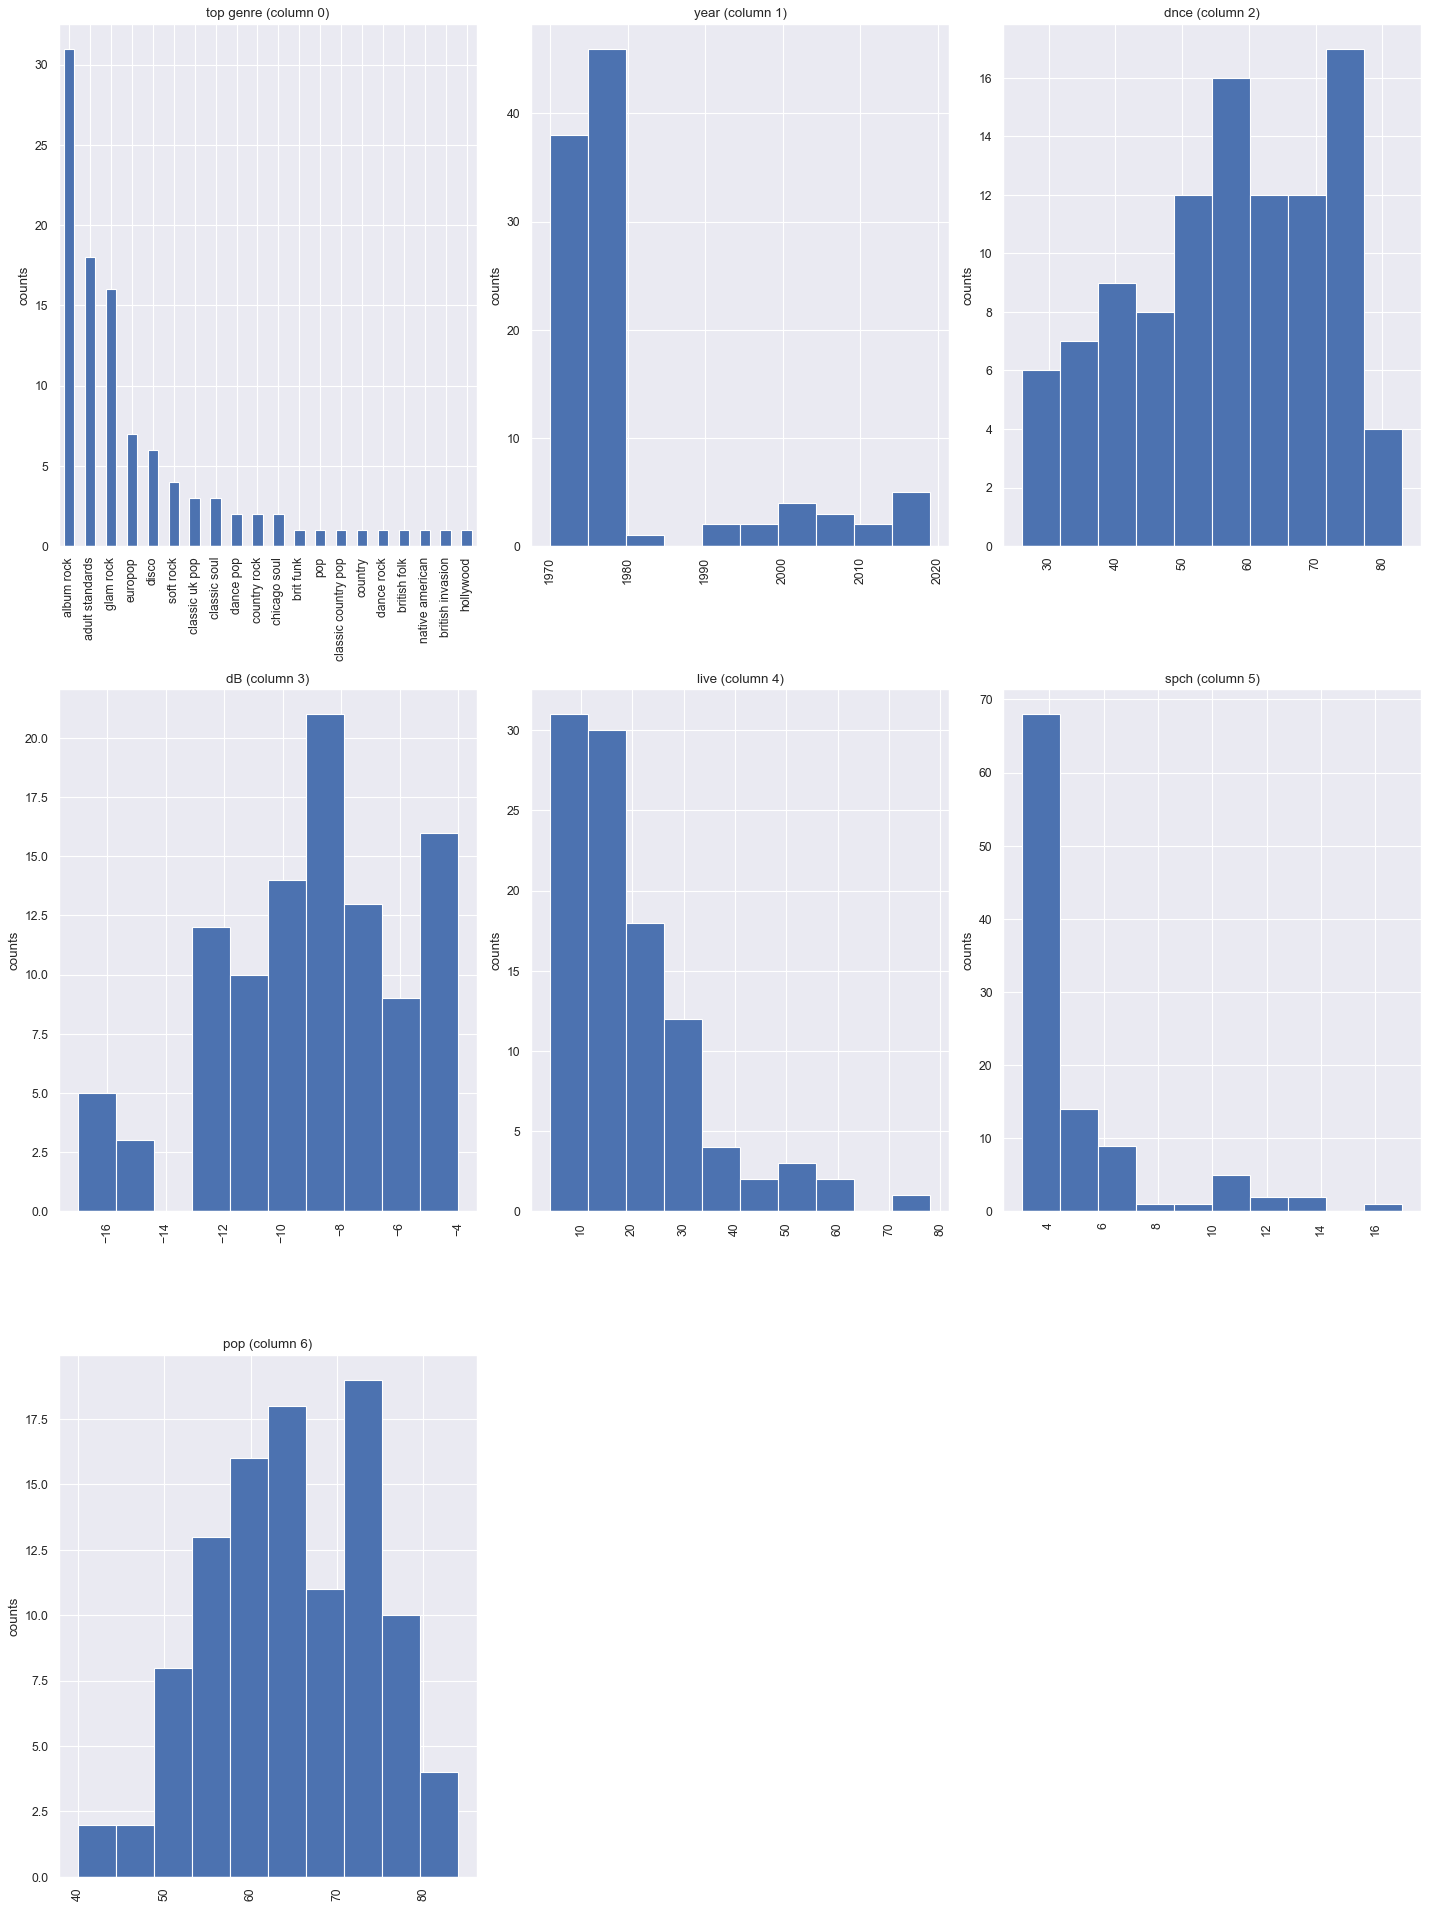

In [37]:
plotPerColumnDistribution(df_1970,nGraphShown=15,nGraphPerRow=3)

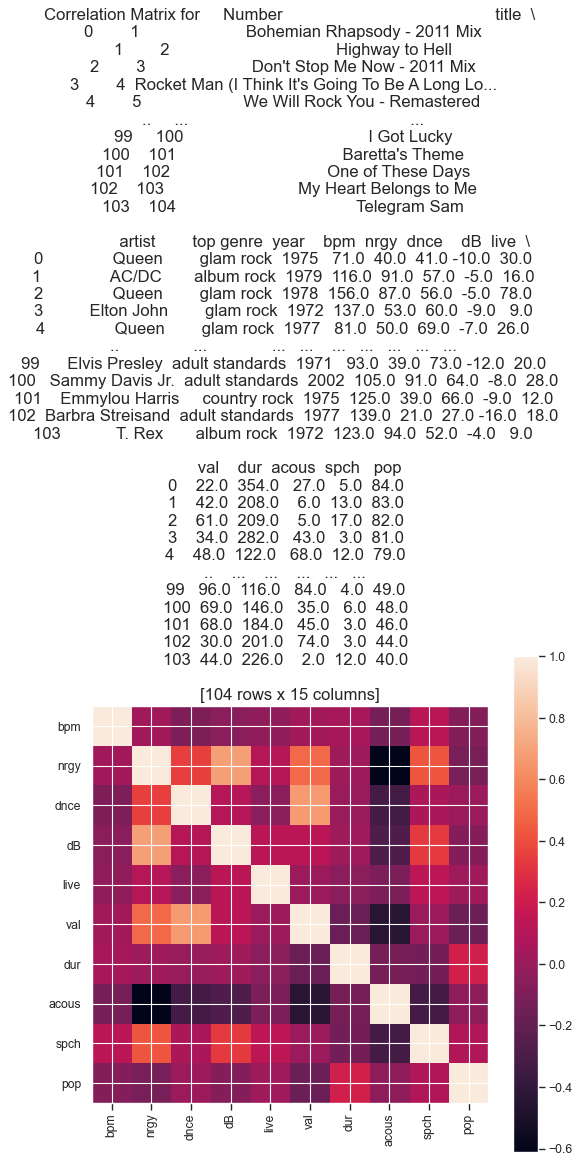

In [38]:
plotCorrelationMatrix(df_1970, 8)

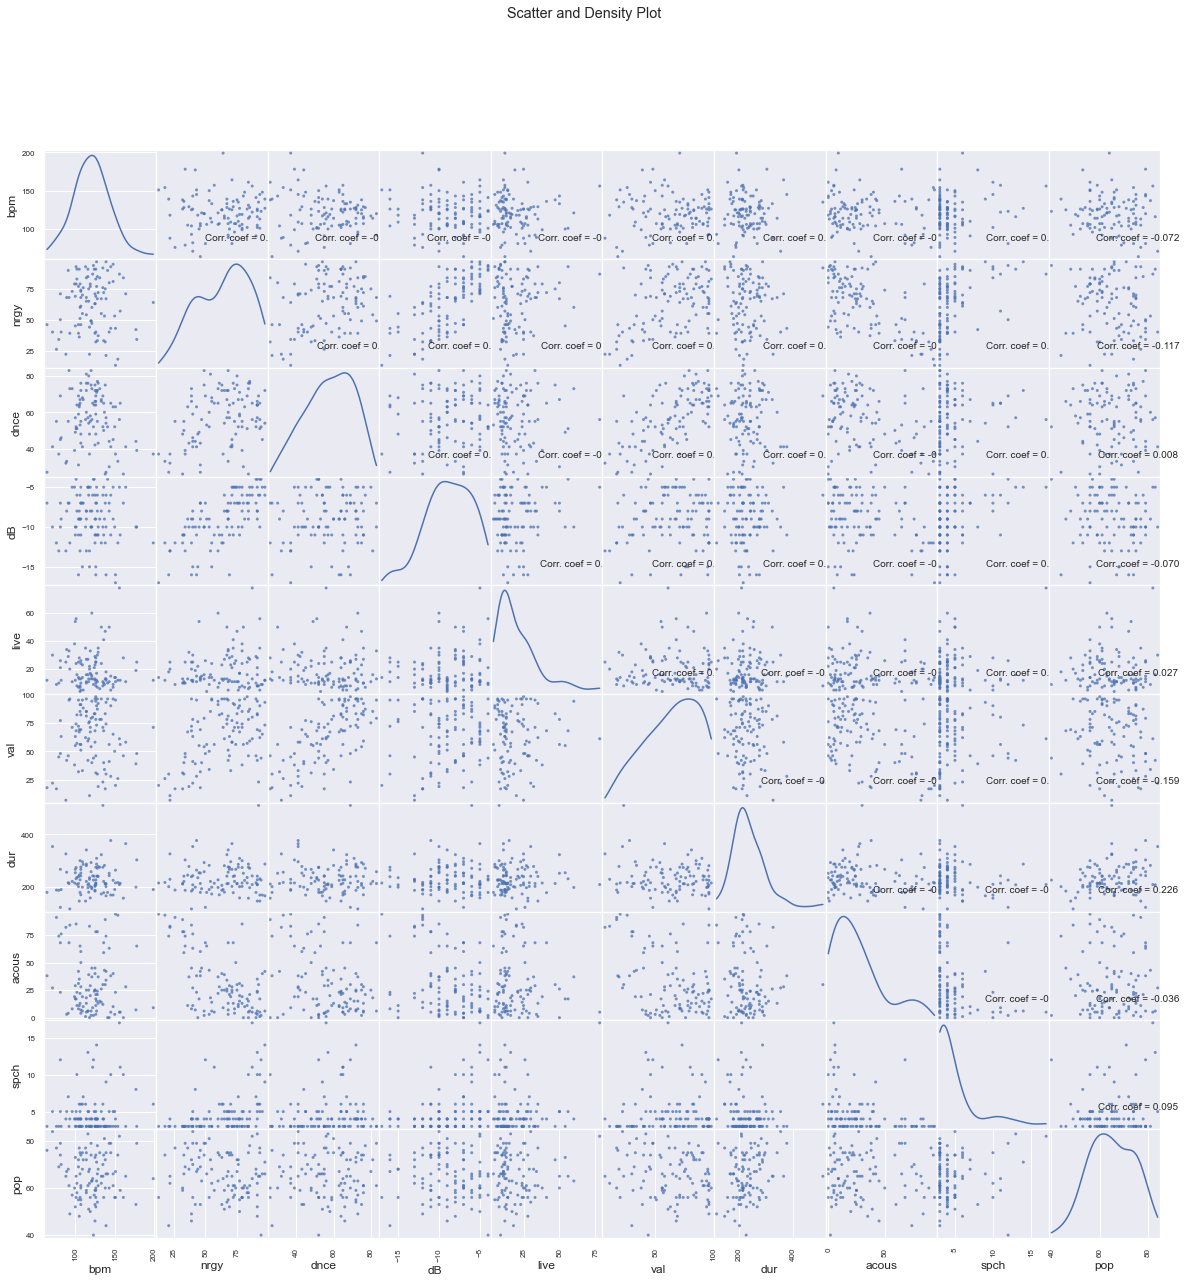

In [39]:
#Scatter and density plots
plotScatterMatrix(df_1970, plotSize=20, textSize=10)

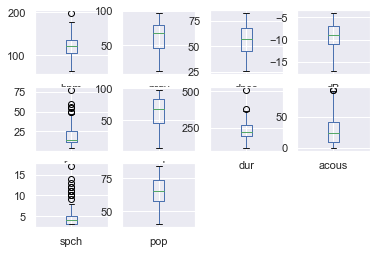

In [40]:
from pandas import read_csv
from matplotlib import pyplot
df_1970[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']].plot(kind='box',subplots=True,layout=(3,4))
pyplot.show()

# We will take a look at decade 80

In [41]:
nRowsRead=1000
nRow,nCol=df_1980.shape
print(f'There are {nRow} rows and {nCol} columns in df_1980')

There are 105 rows and 15 columns in df_1980


In [42]:
df_1980.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     105 non-null    object 
 1   title      103 non-null    object 
 2   artist     103 non-null    object 
 3   top genre  102 non-null    object 
 4   year       103 non-null    float64
 5   bpm        103 non-null    float64
 6   nrgy       103 non-null    float64
 7   dnce       103 non-null    float64
 8   dB         103 non-null    float64
 9   live       103 non-null    float64
 10  val        103 non-null    float64
 11  dur        103 non-null    float64
 12  acous      103 non-null    float64
 13  spch       103 non-null    float64
 14  pop        103 non-null    float64
dtypes: float64(11), object(4)
memory usage: 12.4+ KB


In [43]:
#let's change year to object since we plan to transform the year into a categorical variable
convert_dict={'year':object}
df_1980=df_1980.astype(convert_dict)
print(df_1980.dtypes)

Number        object
title         object
artist        object
top genre     object
year          object
bpm          float64
nrgy         float64
dnce         float64
dB           float64
live         float64
val          float64
dur          float64
acous        float64
spch         float64
pop          float64
dtype: object


In [44]:
df_1980.isnull().sum()

Number       0
title        2
artist       2
top genre    3
year         2
bpm          2
nrgy         2
dnce         2
dB           2
live         2
val          2
dur          2
acous        2
spch         2
pop          2
dtype: int64

In [45]:
df_1980.describe()

bpm        nrgy        dnce          dB        live         val  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean   121.776699   65.475728   62.475728   -8.990291   16.572816   63.728155   
std     24.304414   19.965089   13.359174    3.652813   13.947100   25.796410   
min     62.000000   24.000000   27.000000  -18.000000    2.000000   11.000000   
25%    107.500000   50.000000   53.000000  -11.500000    8.000000   40.500000   
50%    122.000000   68.000000   63.000000   -8.000000   12.000000   71.000000   
75%    136.500000   83.000000   71.000000   -6.000000   20.000000   85.000000   
max    180.000000   98.000000   93.000000   -3.000000   70.000000   98.000000   

              dur       acous        spch         pop  
count  103.000000  103.000000  103.000000  103.000000  
mean   259.621359   24.048544    4.446602   67.805825  
std     51.481030   21.515785    2.861948    7.355215  
min    162.000000    0.000000    2.000000   43.000000  
25%    227.000000    7.000000    3.000000   64.000000  
50%    252.000000   18.000000    4.000000   68.000000  
75%    285.500000   35.500000    4.000000   72.000000  
max    433.000000   80.000000   19.000000   83.000000

In [46]:
df_1980.corr()

bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.148096 -0.140409  0.095768 -0.020501  0.120136 -0.212614   
nrgy   0.148096  1.000000  0.091001  0.768347  0.223746  0.557258 -0.032683   
dnce  -0.140409  0.091001  1.000000 -0.009337 -0.084824  0.515981 -0.036828   
dB     0.095768  0.768347 -0.009337  1.000000  0.226003  0.273662 -0.053731   
live  -0.020501  0.223746 -0.084824  0.226003  1.000000  0.134204 -0.190377   
val    0.120136  0.557258  0.515981  0.273662  0.134204  1.000000 -0.090335   
dur   -0.212614 -0.032683 -0.036828 -0.053731 -0.190377 -0.090335  1.000000   
acous -0.113461 -0.426866 -0.088422 -0.337809 -0.087128 -0.251367  0.106380   
spch   0.119702  0.329111  0.062084  0.234031  0.096441  0.178277 -0.039963   
pop    0.011766 -0.115465 -0.142628 -0.040798  0.061495 -0.112303 -0.182731   

          acous      spch       pop  
bpm   -0.113461  0.119702  0.011766  
nrgy  -0.426866  0.329111 -0.115465  
dnce  -0.088422  0.062084 -0.142628  
dB    -0.337809  0.234031 -0.040798  
live  -0.087128  0.096441  0.061495  
val   -0.251367  0.178277 -0.112303  
dur    0.106380 -0.039963 -0.182731  
acous  1.000000  0.052981 -0.120620  
spch   0.052981  1.000000  0.062843  
pop   -0.120620  0.062843  1.000000

## comments on correlation
nrgy is highly correlated with db and val
dnce is highly correlated with val

For this decade there are not too much correlated variables

In [47]:
# let's check the skewness
df_1980.skew()

year     1.705813
bpm      0.257255
nrgy    -0.344957
dnce    -0.115733
dB      -0.527321
live     2.140266
val     -0.462290
dur      1.082231
acous    0.943975
spch     3.433191
pop     -0.474054
dtype: float64

## Interpret the skewness¶¶
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: bpm, nrgy, dnce, val, pop

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed:dB,acous

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: live, dur, spch

# Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


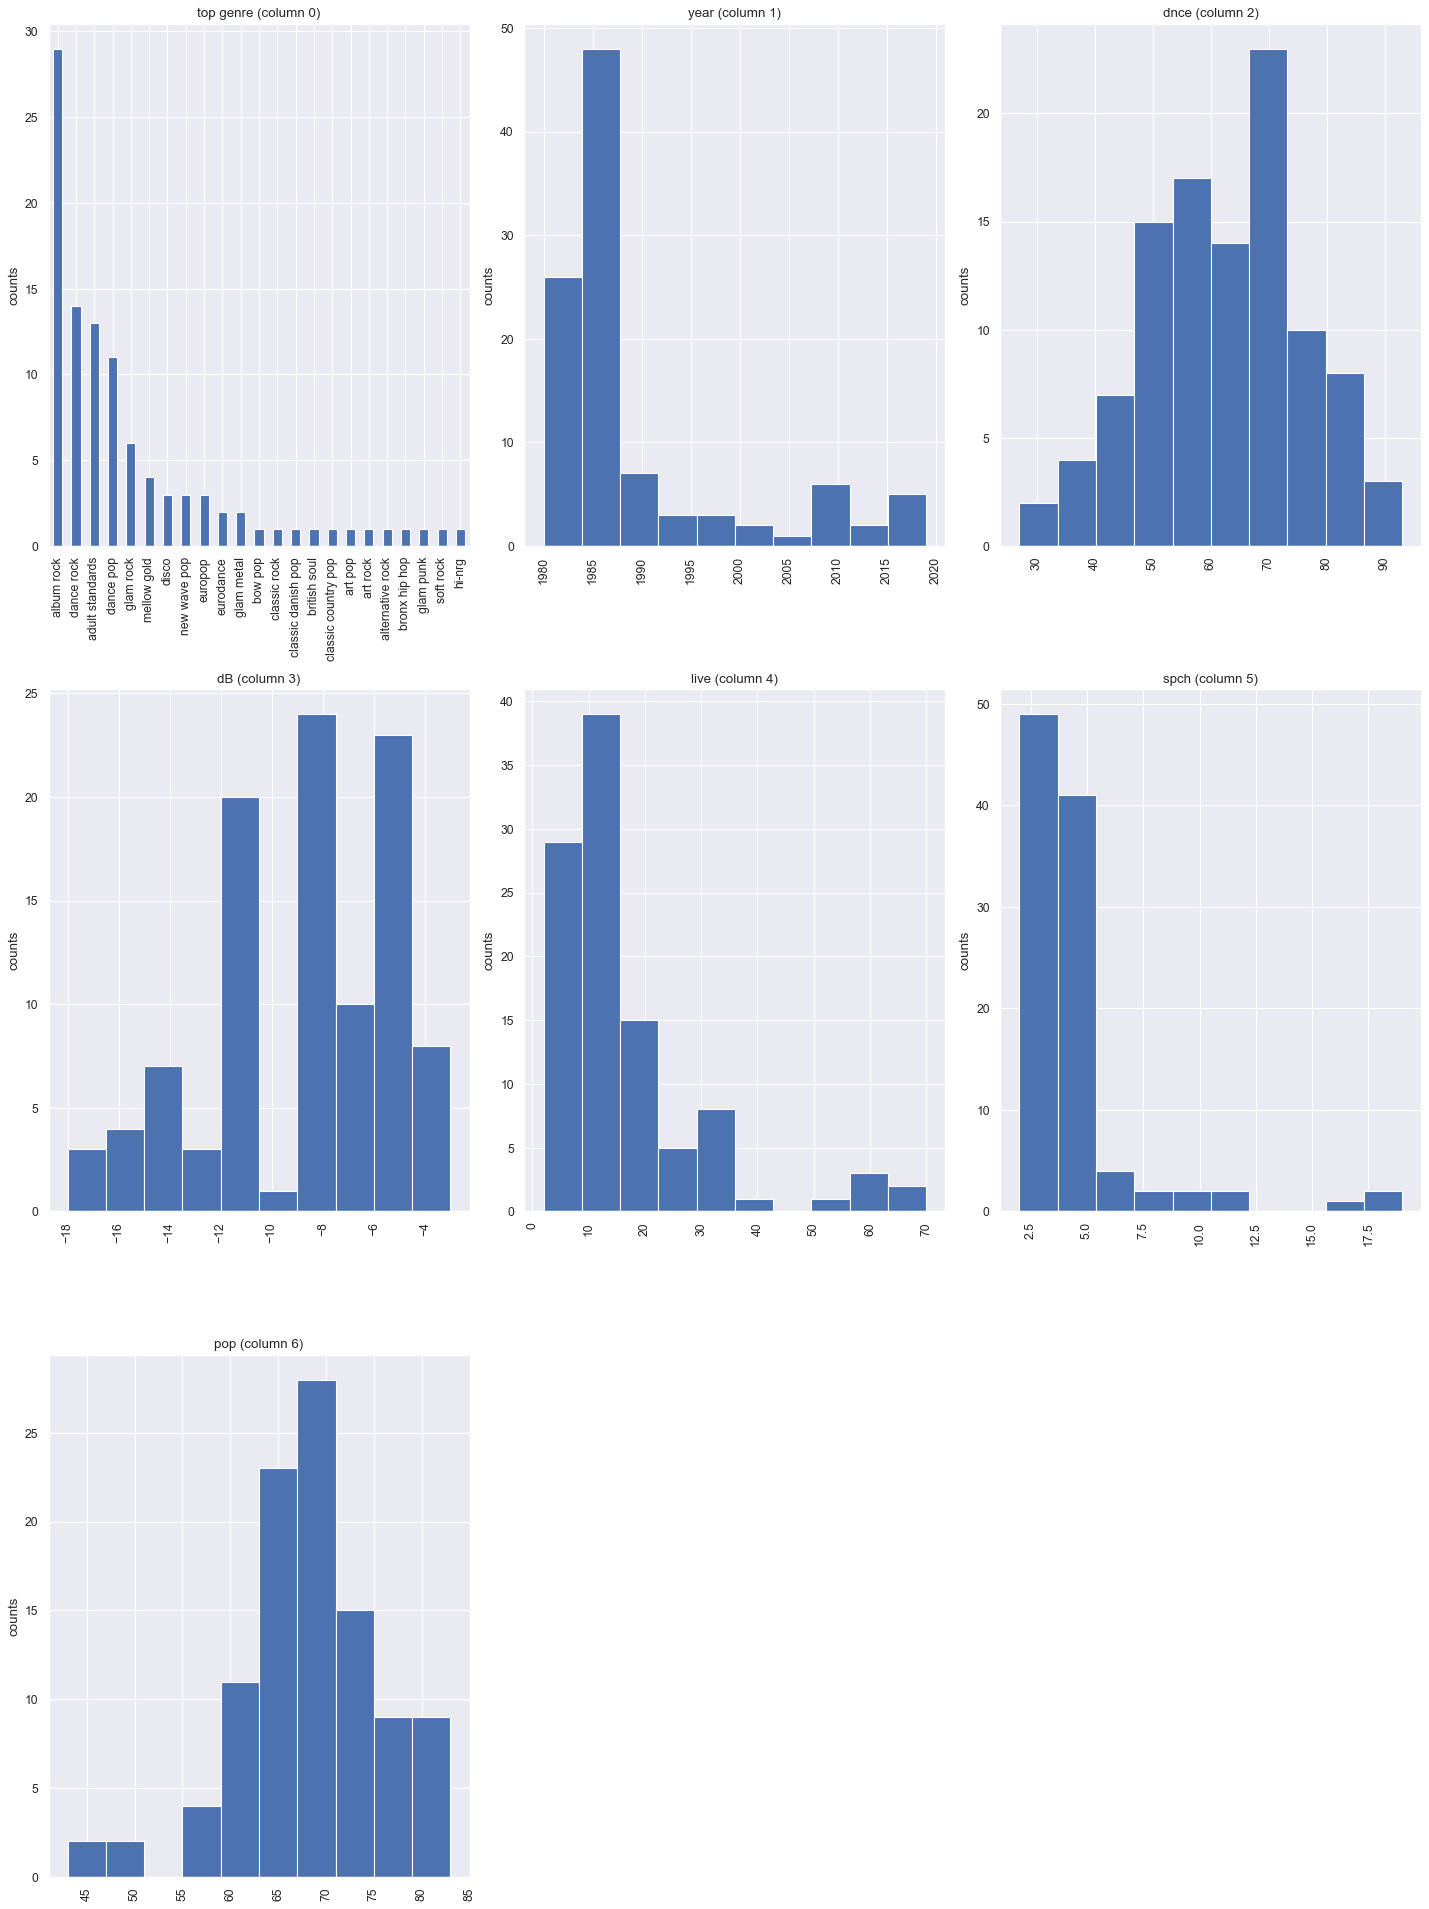

In [48]:
plotPerColumnDistribution(df_1980,nGraphShown=15,nGraphPerRow=3)

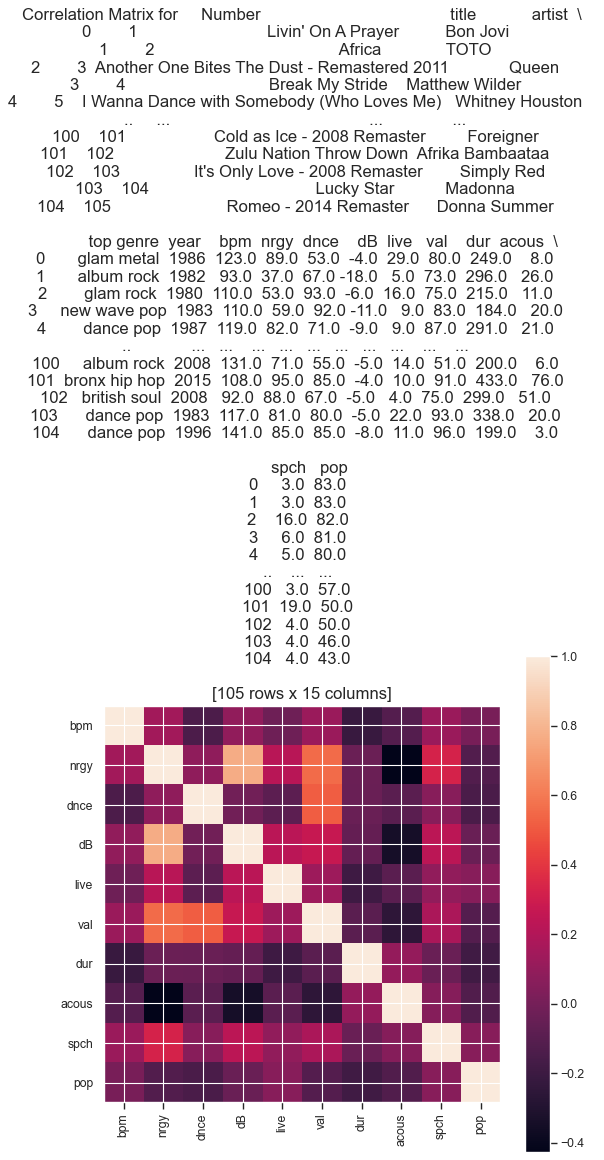

In [49]:
plotCorrelationMatrix(df_1980, 8)

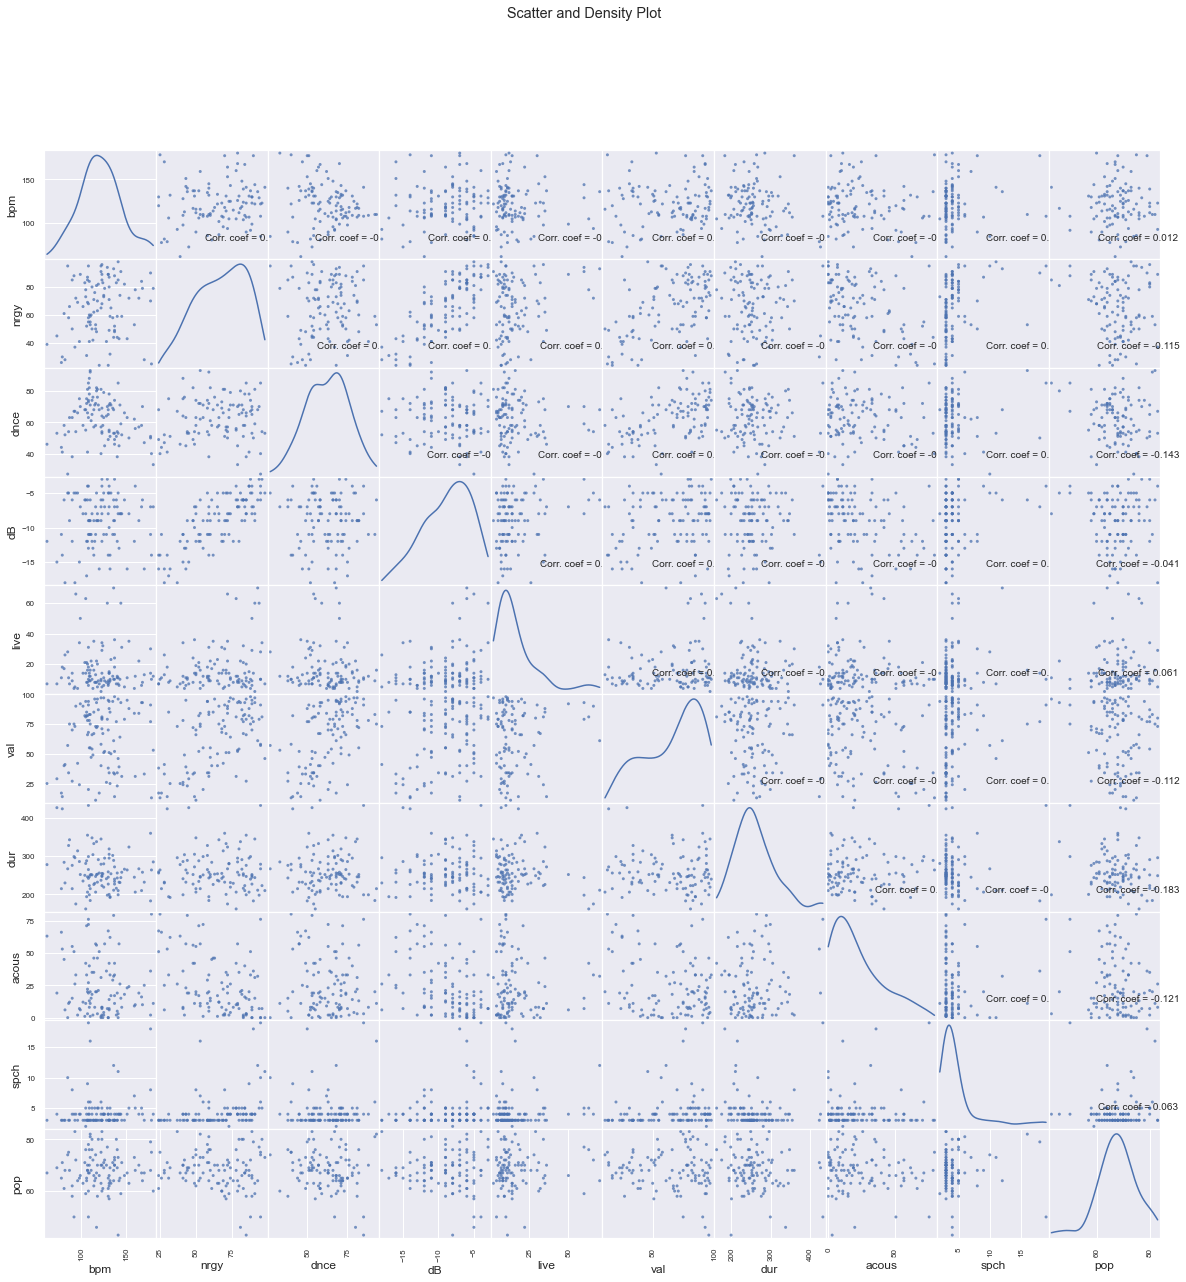

In [50]:
#Scatter and density plots
plotScatterMatrix(df_1980, plotSize=20, textSize=10)

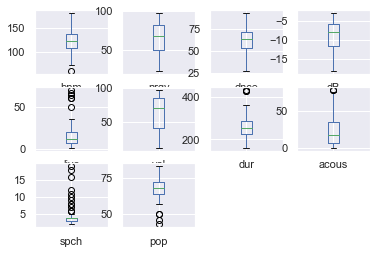

In [51]:
from pandas import read_csv
from matplotlib import pyplot
df_1980[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']].plot(kind='box',subplots=True,layout=(3,4))
pyplot.show()

# We will take a look at decade 90

In [52]:
nRowsRead=1000
nRow,nCol=df_1990.shape
print(f'There are {nRow} rows and {nCol} columns in df_1990')

There are 88 rows and 15 columns in df_1990


In [53]:
df_1990.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     88 non-null     object 
 1   title      84 non-null     object 
 2   artist     84 non-null     object 
 3   top genre  81 non-null     object 
 4   year       84 non-null     float64
 5   bpm        84 non-null     float64
 6   nrgy       84 non-null     float64
 7   dnce       84 non-null     float64
 8   dB         84 non-null     float64
 9   live       84 non-null     float64
 10  val        84 non-null     float64
 11  dur        84 non-null     float64
 12  acous      84 non-null     float64
 13  spch       84 non-null     float64
 14  pop        84 non-null     float64
dtypes: float64(11), object(4)
memory usage: 10.4+ KB


In [54]:
#let's change year to object since we plan to transform the year into a categorical variable
convert_dict={'year':object}
df_1990=df_1990.astype(convert_dict)
print(df_1990.dtypes)

Number        object
title         object
artist        object
top genre     object
year          object
bpm          float64
nrgy         float64
dnce         float64
dB           float64
live         float64
val          float64
dur          float64
acous        float64
spch         float64
pop          float64
dtype: object


In [55]:
df_1990.isnull().sum()

Number       0
title        4
artist       4
top genre    7
year         4
bpm          4
nrgy         4
dnce         4
dB           4
live         4
val          4
dur          4
acous        4
spch         4
pop          4
dtype: int64

In [56]:
df_1990.describe()

bpm        nrgy       dnce         dB       live        val  \
count   84.000000   84.000000  84.000000  84.000000  84.000000  84.000000   
mean   122.214286   70.369048  65.678571  -7.500000  18.071429  57.154762   
std     25.789730   18.135222  13.952726   2.427255  14.094163  23.452846   
min     67.000000   28.000000  31.000000 -14.000000   3.000000  10.000000   
25%    102.000000   55.500000  57.500000  -9.000000   9.000000  42.750000   
50%    125.500000   71.000000  67.000000  -7.000000  13.500000  59.000000   
75%    134.500000   85.250000  74.250000  -6.000000  24.250000  76.000000   
max    174.000000  100.000000  92.000000  -1.000000  93.000000  97.000000   

              dur      acous       spch        pop  
count   84.000000  84.000000  84.000000  84.000000  
mean   255.297619  19.416667   6.535714  63.773810  
std     41.805856  21.630082   6.553664   7.632131  
min    191.000000   0.000000   2.000000  43.000000  
25%    223.750000   3.000000   3.000000  58.000000  
50%    248.000000  10.000000   4.000000  64.500000  
75%    275.250000  27.250000   6.250000  70.000000  
max    394.000000  76.000000  36.000000  79.000000

In [57]:
df_1990.corr()

bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.185175 -0.249317 -0.096042 -0.188016  0.043588 -0.068963   
nrgy   0.185175  1.000000  0.251832  0.316814 -0.013963  0.556833 -0.372879   
dnce  -0.249317  0.251832  1.000000  0.098010 -0.020284  0.599119 -0.300674   
dB    -0.096042  0.316814  0.098010  1.000000  0.058814  0.093865 -0.193831   
live  -0.188016 -0.013963 -0.020284  0.058814  1.000000  0.033062 -0.023142   
val    0.043588  0.556833  0.599119  0.093865  0.033062  1.000000 -0.401823   
dur   -0.068963 -0.372879 -0.300674 -0.193831 -0.023142 -0.401823  1.000000   
acous -0.079341 -0.506753 -0.324949 -0.178881  0.122178 -0.442881  0.268721   
spch  -0.004109  0.018185  0.351461  0.176094 -0.037854  0.274199 -0.064088   
pop   -0.022093 -0.004438  0.021032  0.300146 -0.006344  0.114894 -0.100645   

          acous      spch       pop  
bpm   -0.079341 -0.004109 -0.022093  
nrgy  -0.506753  0.018185 -0.004438  
dnce  -0.324949  0.351461  0.021032  
dB    -0.178881  0.176094  0.300146  
live   0.122178 -0.037854 -0.006344  
val   -0.442881  0.274199  0.114894  
dur    0.268721 -0.064088 -0.100645  
acous  1.000000 -0.002953 -0.096562  
spch  -0.002953  1.000000  0.079773  
pop   -0.096562  0.079773  1.000000

## comments on correlation
nrgy is highly correlated to val and acous
dnce is highly correlated to val
val is moderately correlated to dur and acous

In [58]:
#let's take a look at the skewness
df_1990.skew()

year     1.166996
bpm      0.092768
nrgy    -0.307059
dnce    -0.417853
dB      -0.248561
live     2.401451
val     -0.314004
dur      1.131226
acous    1.162006
spch     2.633016
pop     -0.500752
dtype: float64

## Interpret the skewness¶¶
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: bpm, nrgy, dnce, dB, val, pop

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed:pop

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: live, dur, acous, spch

# Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


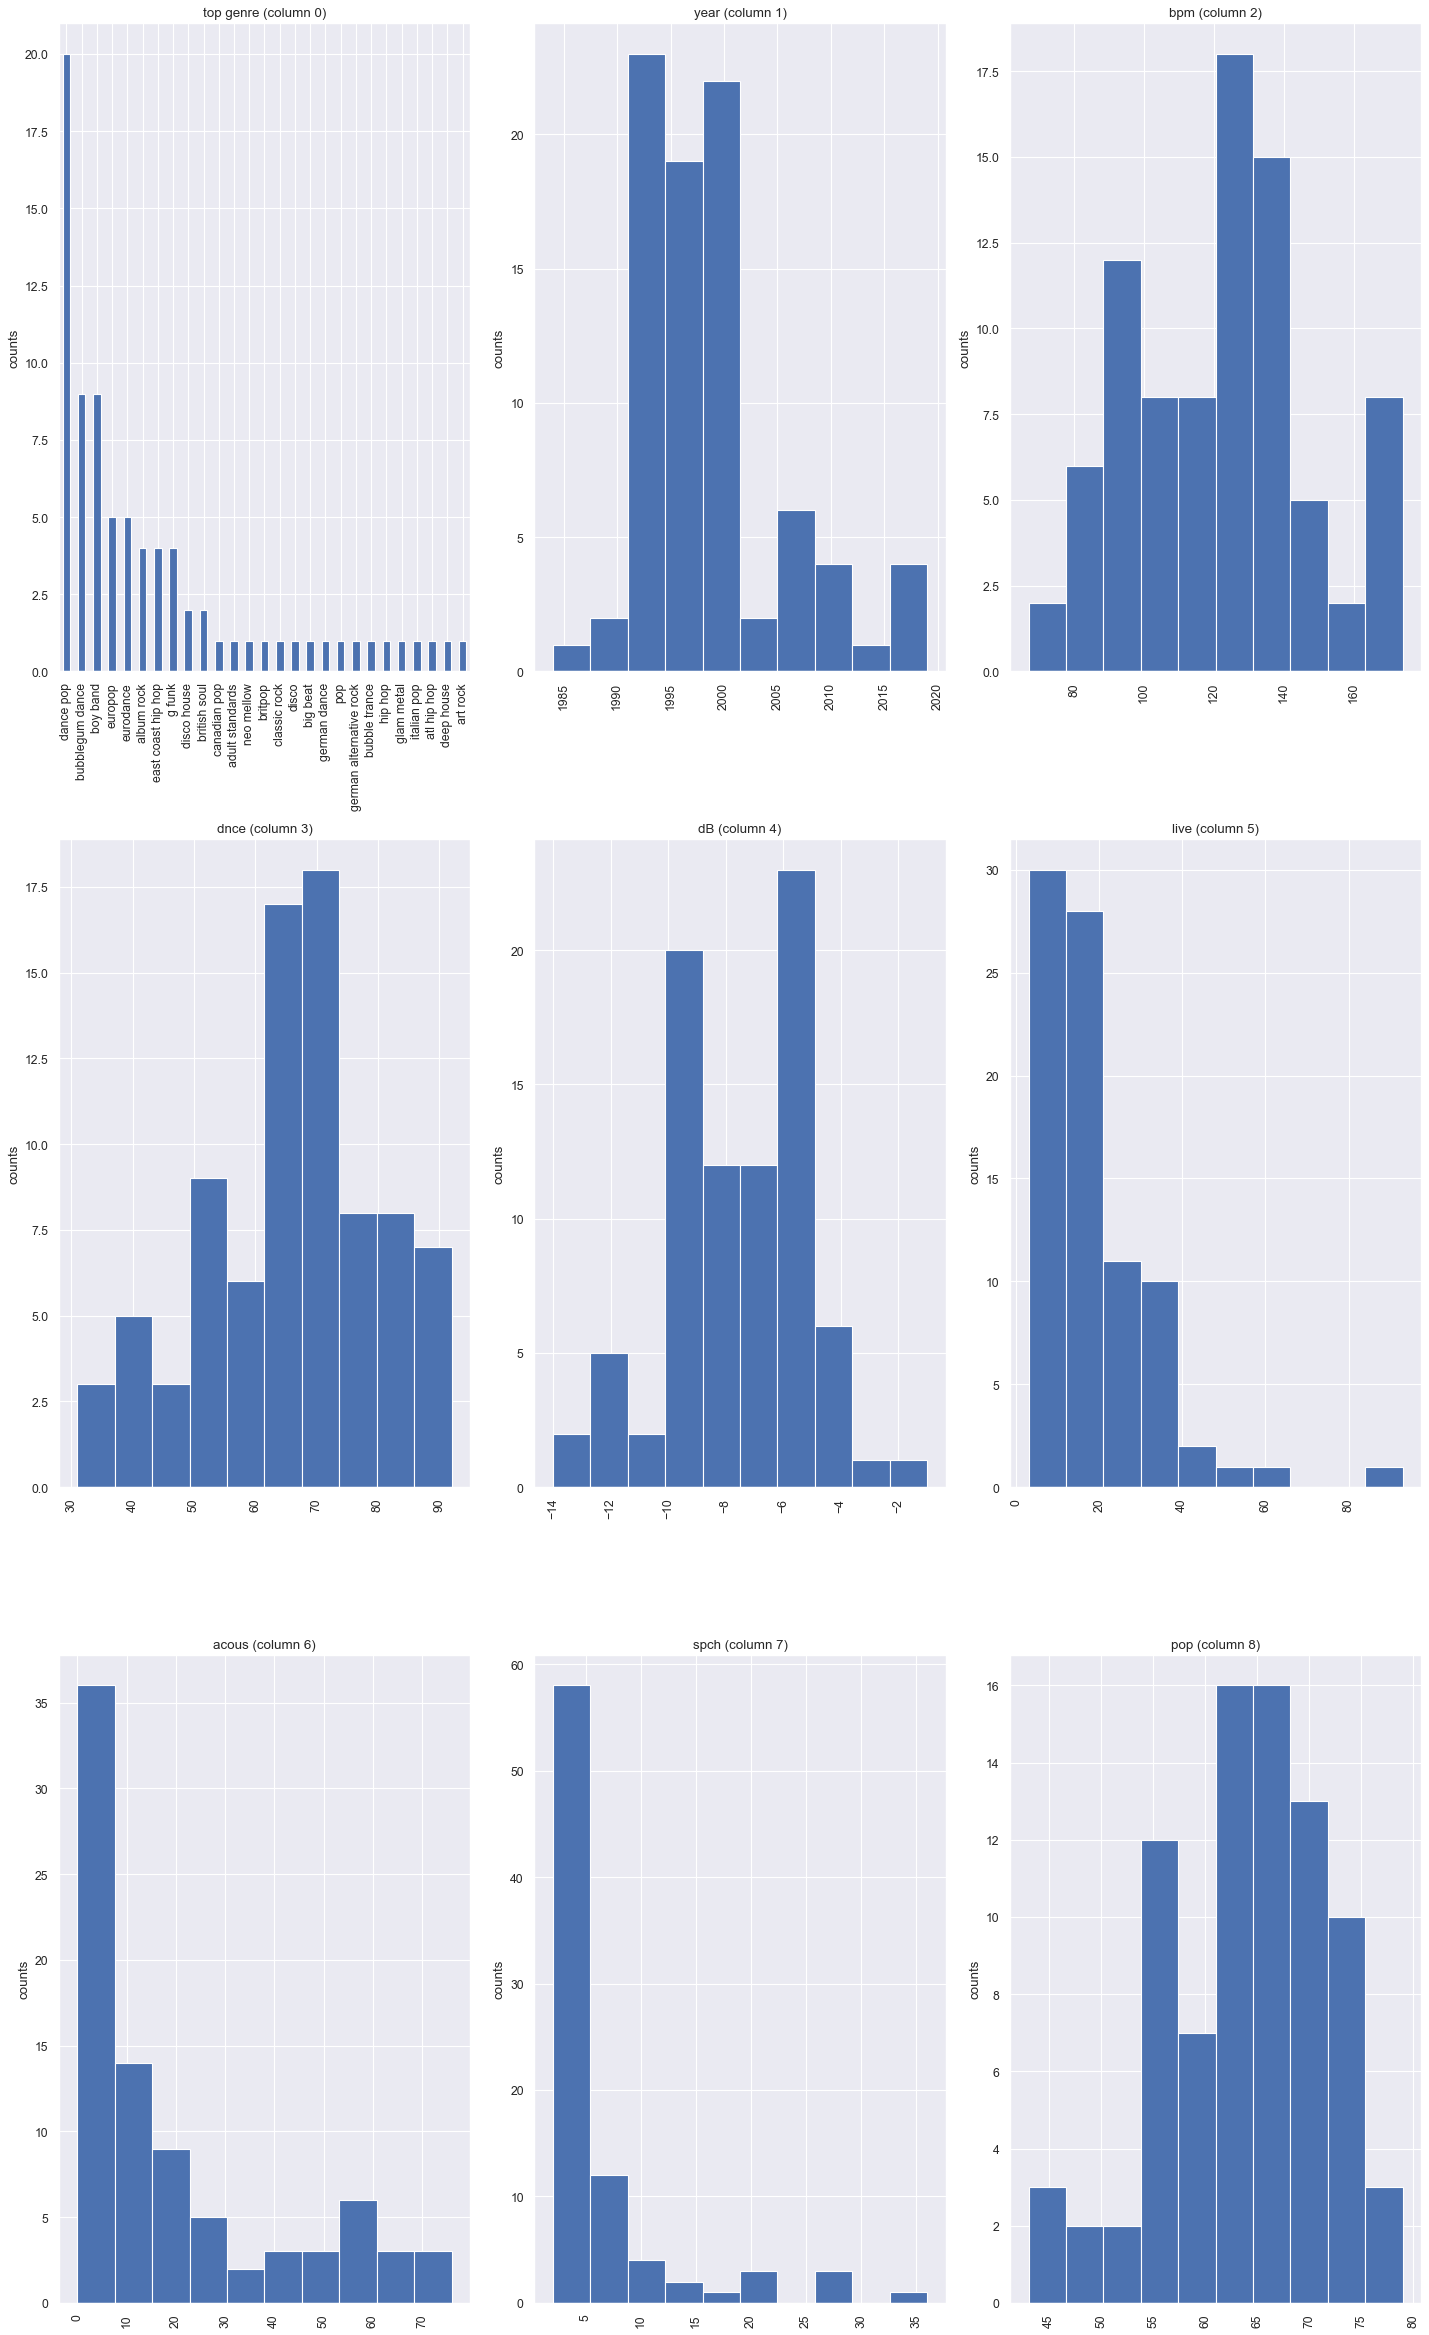

In [59]:
plotPerColumnDistribution(df_1990,nGraphShown=15,nGraphPerRow=3)

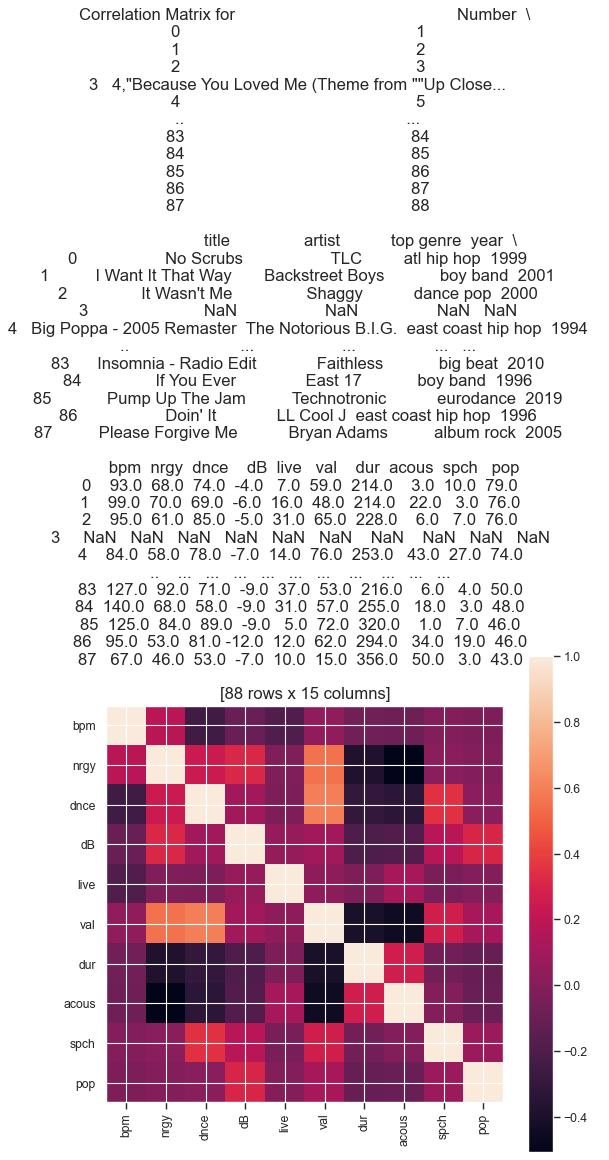

In [60]:
plotCorrelationMatrix(df_1990, 8)

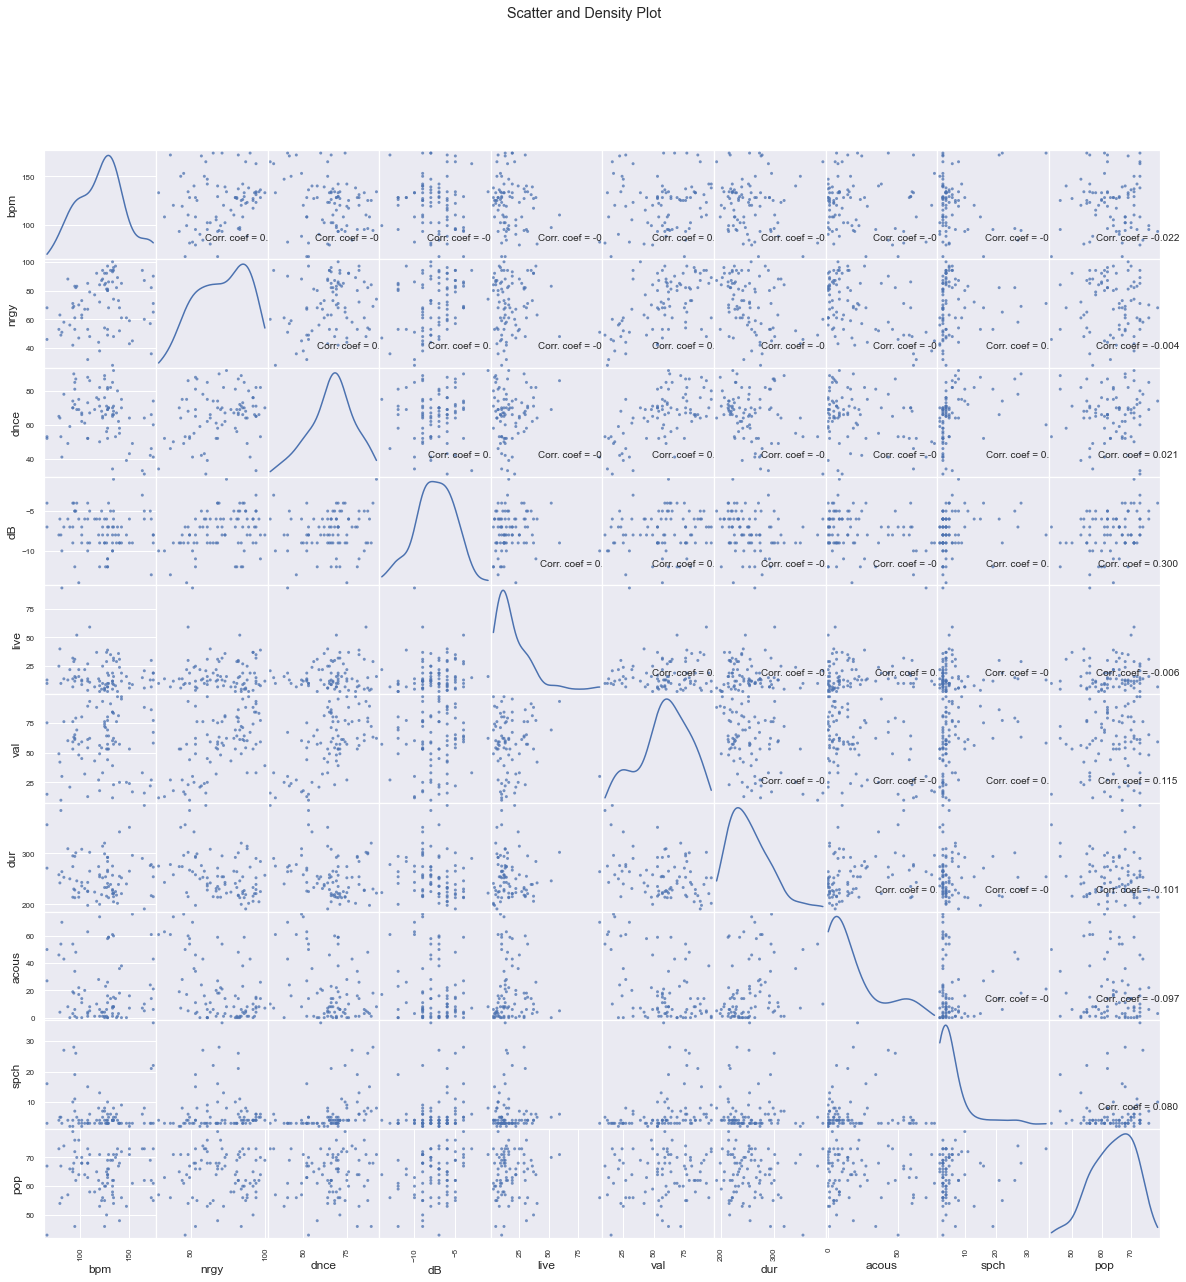

In [61]:
#Scatter and density plots
plotScatterMatrix(df_1990, plotSize=20, textSize=10)

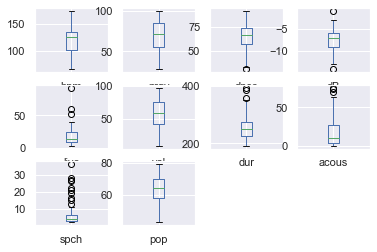

In [62]:
from pandas import read_csv
from matplotlib import pyplot
df_1990[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']].plot(kind='box',subplots=True,layout=(3,4))
pyplot.show()

# we will take a look at decade 2000s

In [63]:
nRowsRead=1000
nRow,nCol=df_2000.shape
print(f'There are {nRow} rows and {nCol} columns in df_2000')

There are 100 rows and 15 columns in df_2000


In [64]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     100 non-null    object 
 1   title      99 non-null     object 
 2   artist     99 non-null     object 
 3   top genre  99 non-null     object 
 4   year       99 non-null     float64
 5   bpm        99 non-null     float64
 6   nrgy       99 non-null     float64
 7   dnce       99 non-null     float64
 8   dB         99 non-null     float64
 9   live       99 non-null     float64
 10  val        99 non-null     float64
 11  dur        99 non-null     float64
 12  acous      99 non-null     float64
 13  spch       99 non-null     float64
 14  pop        99 non-null     float64
dtypes: float64(11), object(4)
memory usage: 11.8+ KB


In [65]:
#let's change year to object since we plan to transform the year into a categorical variable
convert_dict={'year':object}
df_2000=df_2000.astype(convert_dict)
print(df_2000.dtypes)

Number        object
title         object
artist        object
top genre     object
year          object
bpm          float64
nrgy         float64
dnce         float64
dB           float64
live         float64
val          float64
dur          float64
acous        float64
spch         float64
pop          float64
dtype: object


In [66]:
df_2000.isnull().sum()

Number       0
title        1
artist       1
top genre    1
year         1
bpm          1
nrgy         1
dnce         1
dB           1
live         1
val          1
dur          1
acous        1
spch         1
pop          1
dtype: int64

In [67]:
df_2000.describe()

bpm       nrgy       dnce         dB       live        val  \
count   99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean   118.272727  70.878788  68.525253  -5.767677  17.989899  57.828283   
std     22.865989  14.571620  14.357920   1.845172  17.288958  22.167747   
min     77.000000  30.000000  21.000000 -11.000000   3.000000   8.000000   
25%     99.500000  62.000000  60.500000  -7.000000   7.500000  44.500000   
50%    120.000000  72.000000  67.000000  -6.000000  11.000000  61.000000   
75%    130.000000  81.500000  79.000000  -5.000000  21.000000  76.500000   
max    180.000000  98.000000  96.000000  -2.000000  84.000000  93.000000   

              dur      acous       spch        pop  
count   99.000000  99.000000  99.000000  99.000000  
mean   237.707071  11.393939   9.777778  69.808081  
std     38.592389  15.316936   9.936077   8.649262  
min    157.000000   0.000000   2.000000  32.000000  
25%    210.500000   1.000000   4.000000  65.000000  
50%    229.000000   5.000000   6.000000  72.000000  
75%    263.500000  15.500000  11.500000  76.000000  
max    339.000000  74.000000  47.000000  83.000000

In [68]:
df_2000.corr()

bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.203940 -0.148137  0.017831  0.052740 -0.103218  0.195847   
nrgy   0.203940  1.000000 -0.149814  0.566536  0.267888  0.189757 -0.197957   
dnce  -0.148137 -0.149814  1.000000 -0.037777 -0.175628  0.465442  0.036117   
dB     0.017831  0.566536 -0.037777  1.000000  0.095394  0.212784 -0.011215   
live   0.052740  0.267888 -0.175628  0.095394  1.000000 -0.005835 -0.097270   
val   -0.103218  0.189757  0.465442  0.212784 -0.005835  1.000000 -0.000381   
dur    0.195847 -0.197957  0.036117 -0.011215 -0.097270 -0.000381  1.000000   
acous -0.141264 -0.398451 -0.090408 -0.074037 -0.205135 -0.159768  0.084610   
spch   0.034044  0.040548  0.093024  0.017872  0.231292  0.207881  0.158322   
pop   -0.014747 -0.146892 -0.044126  0.009216 -0.022463 -0.107624  0.029544   

          acous      spch       pop  
bpm   -0.141264  0.034044 -0.014747  
nrgy  -0.398451  0.040548 -0.146892  
dnce  -0.090408  0.093024 -0.044126  
dB    -0.074037  0.017872  0.009216  
live  -0.205135  0.231292 -0.022463  
val   -0.159768  0.207881 -0.107624  
dur    0.084610  0.158322  0.029544  
acous  1.000000 -0.108842  0.038318  
spch  -0.108842  1.000000  0.087244  
pop    0.038318  0.087244  1.000000

## comments on correlation
nrgy is highly correlated with dB
dnce is moderately correlated with val

In [69]:
#let's verify the skewness
df_2000.skew()

year     0.025978
bpm      0.356898
nrgy    -0.446268
dnce    -0.322886
dB      -0.458857
live     2.038017
val     -0.421031
dur      0.509481
acous    2.223520
spch     2.072088
pop     -1.572631
dtype: float64

## Interpret the skewness¶¶
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: bpm, nrgy, dnce, dB, val, dur

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed:

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: live, acous, pop, spch

# Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


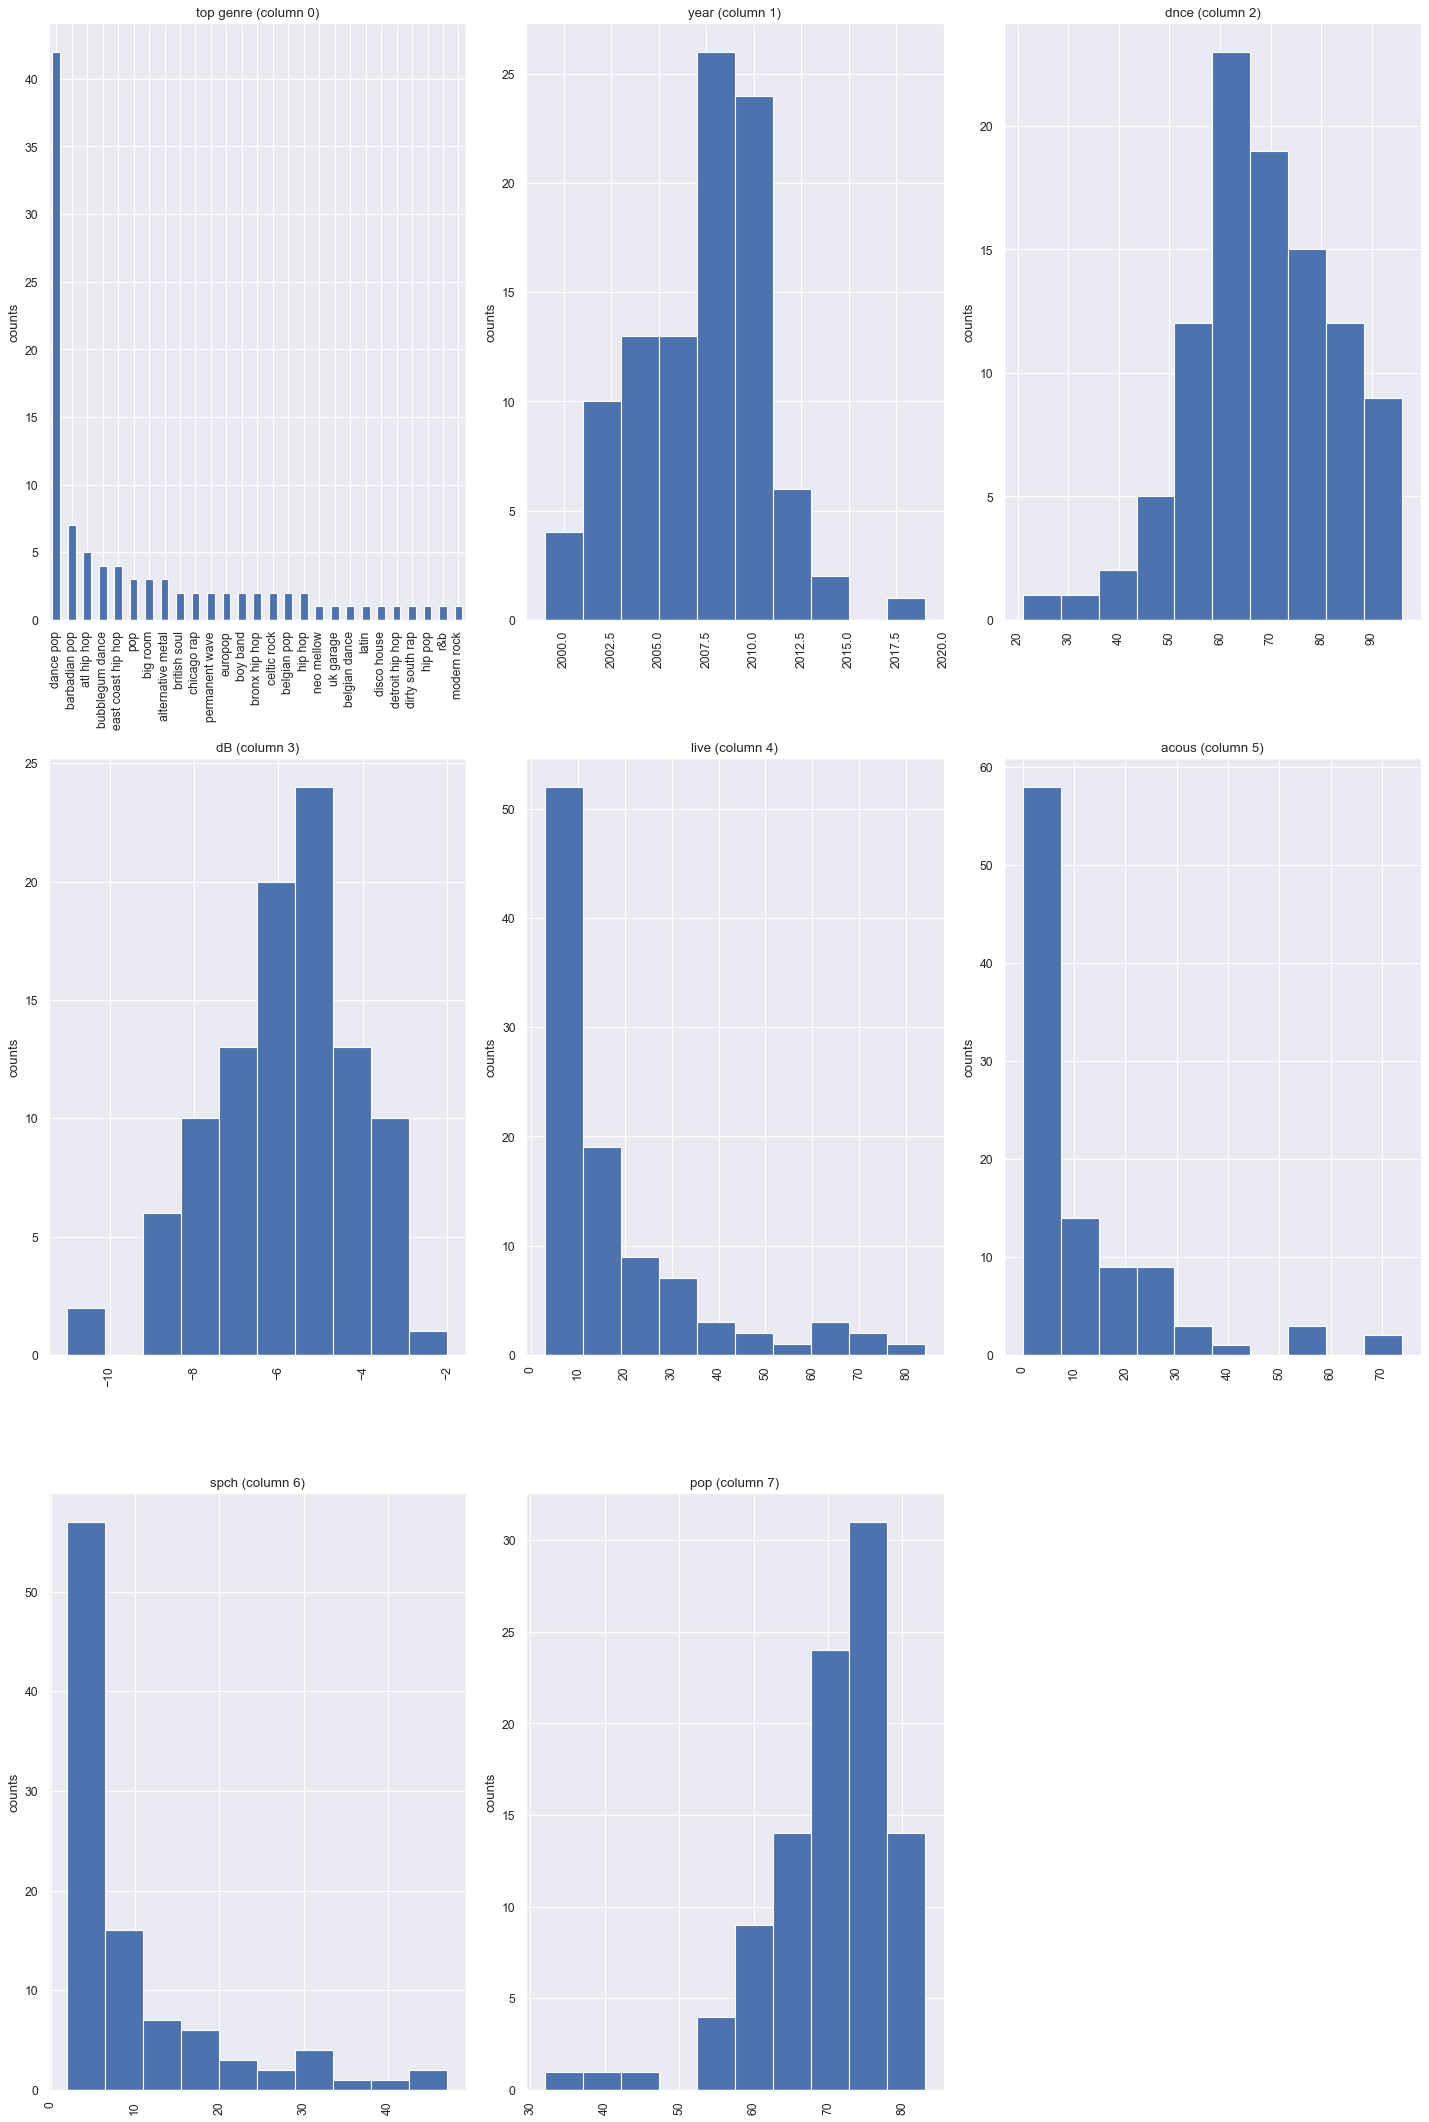

In [70]:
plotPerColumnDistribution(df_2000,nGraphShown=15,nGraphPerRow=3)

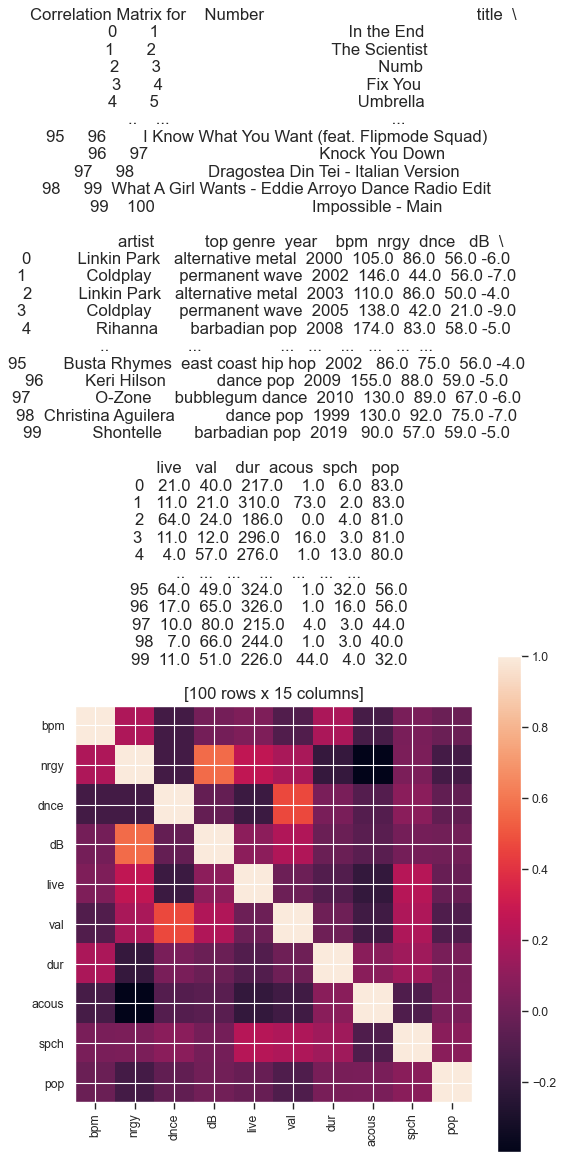

In [71]:
plotCorrelationMatrix(df_2000, 8)

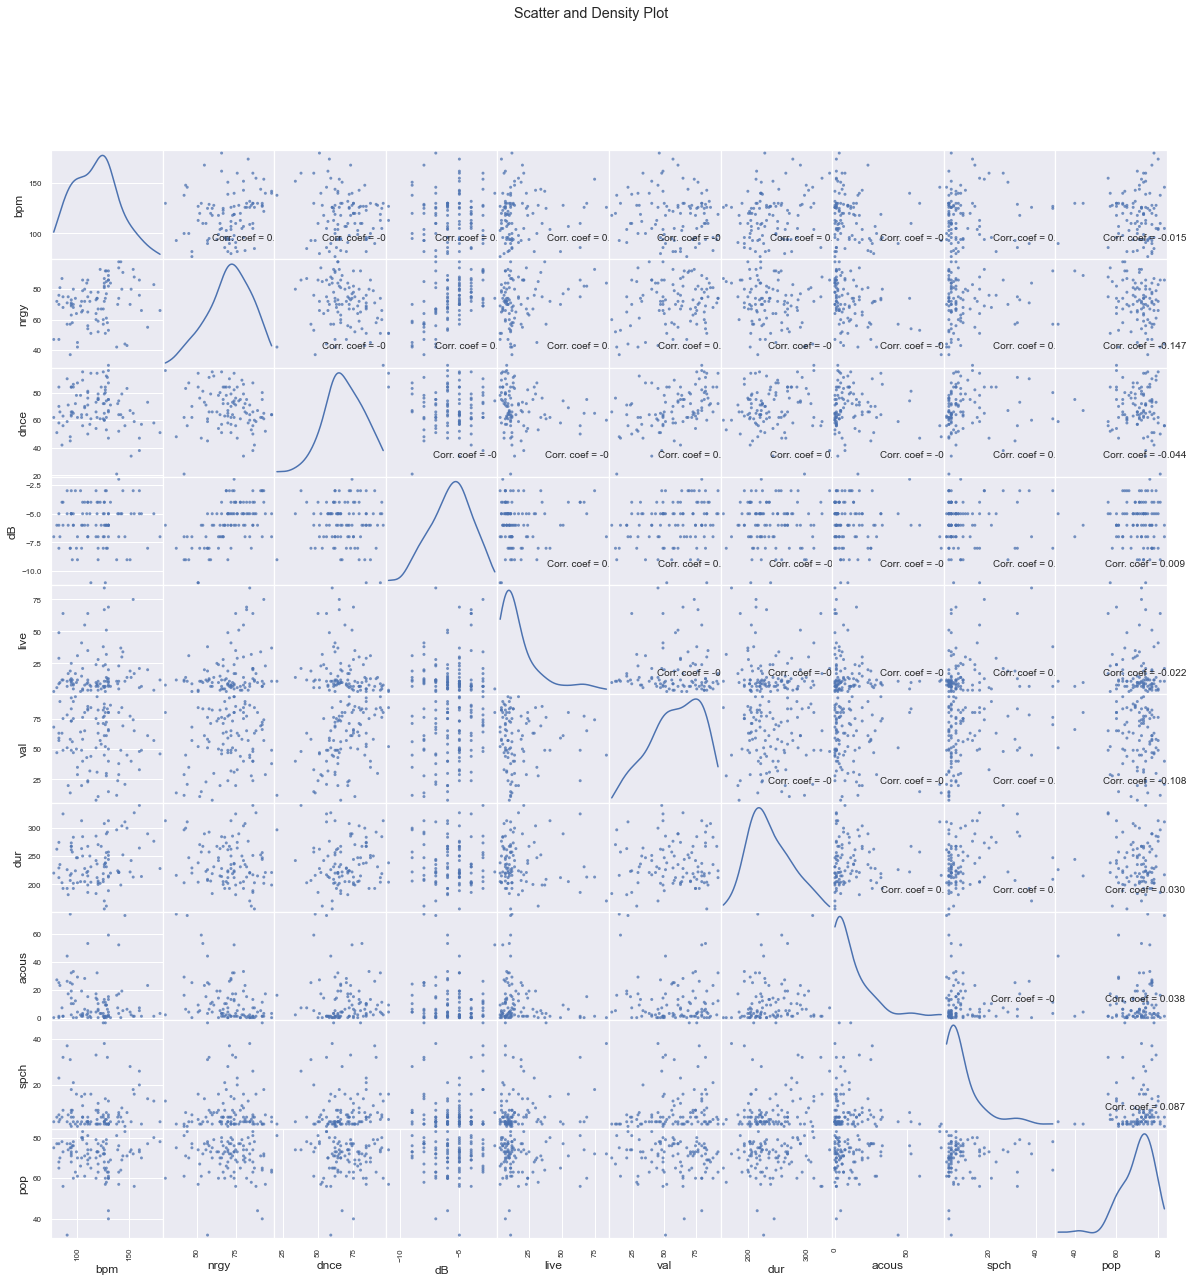

In [72]:
#Scatter and density plots
plotScatterMatrix(df_2000, plotSize=20, textSize=10)

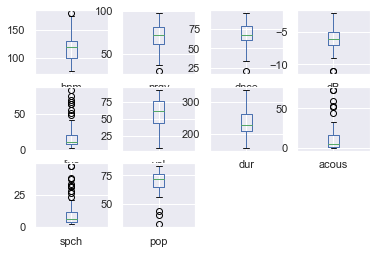

In [73]:
from matplotlib import pyplot
df_2000[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']].plot(kind='box',subplots=True,layout=(3,4))
pyplot.show()

# we will take a look at decade 2010s

In [74]:
nRowsRead=1000
nRow,nCol=df_2010.shape
print(f'There are {nRow} rows and {nCol} columns in df_2010')

There are 100 rows and 15 columns in df_2010


In [75]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     100 non-null    int64 
 1   title      100 non-null    object
 2   artist     100 non-null    object
 3   top genre  100 non-null    object
 4   year       100 non-null    int64 
 5   bpm        100 non-null    int64 
 6   nrgy       100 non-null    int64 
 7   dnce       100 non-null    int64 
 8   dB         100 non-null    int64 
 9   live       100 non-null    int64 
 10  val        100 non-null    int64 
 11  dur        100 non-null    int64 
 12  acous      100 non-null    int64 
 13  spch       100 non-null    int64 
 14  pop        100 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 11.8+ KB


In [76]:
#let's change year to object since we plan to transform the year into a categorical variable
convert_dict={'year':object}
df_2010=df_2010.astype(convert_dict)
print(df_2010.dtypes)

Number        int64
title        object
artist       object
top genre    object
year         object
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object


In [77]:
df_2010.isnull().sum()

Number       0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [78]:
df_2010.describe()

Number         bpm        nrgy        dnce          dB        live  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  118.720000   67.980000   65.370000   -5.490000   17.930000   
std     29.011492   22.389157   16.261114   11.880427    2.002498   13.822288   
min      1.000000   75.000000   17.000000   21.000000  -13.000000    3.000000   
25%     25.750000  101.500000   56.750000   58.000000   -6.000000    9.750000   
50%     50.500000  120.000000   68.000000   67.000000   -5.000000   13.000000   
75%     75.250000  134.000000   80.000000   74.000000   -4.000000   25.000000   
max    100.000000  186.000000   95.000000   91.000000   -2.000000   82.000000   

              val         dur       acous        spch         pop  
count  100.000000  100.000000  100.000000  100.000000  100.000000  
mean    46.350000  209.170000   14.710000    8.440000   75.970000  
std     20.945034   24.080276   17.911846    7.820357    9.209629  
min      9.000000  157.000000    0.000000    3.000000   32.000000  
25%     29.000000  194.000000    3.750000    4.000000   71.750000  
50%     47.000000  209.000000    9.000000    6.000000   78.000000  
75%     61.000000  222.000000   19.000000   10.000000   82.000000  
max     97.000000  306.000000   84.000000   46.000000   94.000000

In [79]:
df_2010.corr()

Number       bpm      nrgy      dnce        dB      live       val  \
Number  1.000000 -0.108064  0.423453 -0.069998  0.356519  0.104397  0.165425   
bpm    -0.108064  1.000000  0.026813 -0.076467 -0.043644 -0.014262 -0.076299   
nrgy    0.423453  0.026813  1.000000  0.061161  0.794119  0.174272  0.424567   
dnce   -0.069998 -0.076467  0.061161  1.000000  0.132524  0.045431  0.387219   
dB      0.356519 -0.043644  0.794119  0.132524  1.000000  0.069180  0.375732   
live    0.104397 -0.014262  0.174272  0.045431  0.069180  1.000000  0.005110   
val     0.165425 -0.076299  0.424567  0.387219  0.375732  0.005110  1.000000   
dur     0.067154 -0.027527 -0.174527 -0.274811 -0.213595  0.137844 -0.174337   
acous  -0.246155 -0.057103 -0.510088 -0.103396 -0.355173 -0.183309 -0.061060   
spch   -0.185075  0.079919 -0.083491  0.002579 -0.280863  0.005708 -0.039430   
pop    -0.874115  0.117333 -0.388912 -0.008668 -0.356269 -0.030804 -0.194638   

             dur     acous      spch       pop  
Number  0.067154 -0.246155 -0.185075 -0.874115  
bpm    -0.027527 -0.057103  0.079919  0.117333  
nrgy   -0.174527 -0.510088 -0.083491 -0.388912  
dnce   -0.274811 -0.103396  0.002579 -0.008668  
dB     -0.213595 -0.355173 -0.280863 -0.356269  
live    0.137844 -0.183309  0.005708 -0.030804  
val    -0.174337 -0.061060 -0.039430 -0.194638  
dur     1.000000  0.052761 -0.050768  0.009269  
acous   0.052761  1.000000  0.115504  0.230120  
spch   -0.050768  0.115504  1.000000  0.175775  
pop     0.009269  0.230120  0.175775  1.000000

## comments on correlation
nrgy is highly correlated with dB and acous while moderately correlated with val

In [80]:
#let's verify the skewness
df_2010.skew()

Number    0.000000
year     -0.996139
bpm       0.459987
nrgy     -0.591480
dnce     -0.613346
dB       -1.162485
live      2.357231
val       0.214526
dur       0.631714
acous     2.061499
spch      2.771477
pop      -1.823420
dtype: float64

## Interpret the skewness¶¶
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: bpm, val

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed:nrgy, dnce, dur

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: dB, live, acous, spch, pop

# Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


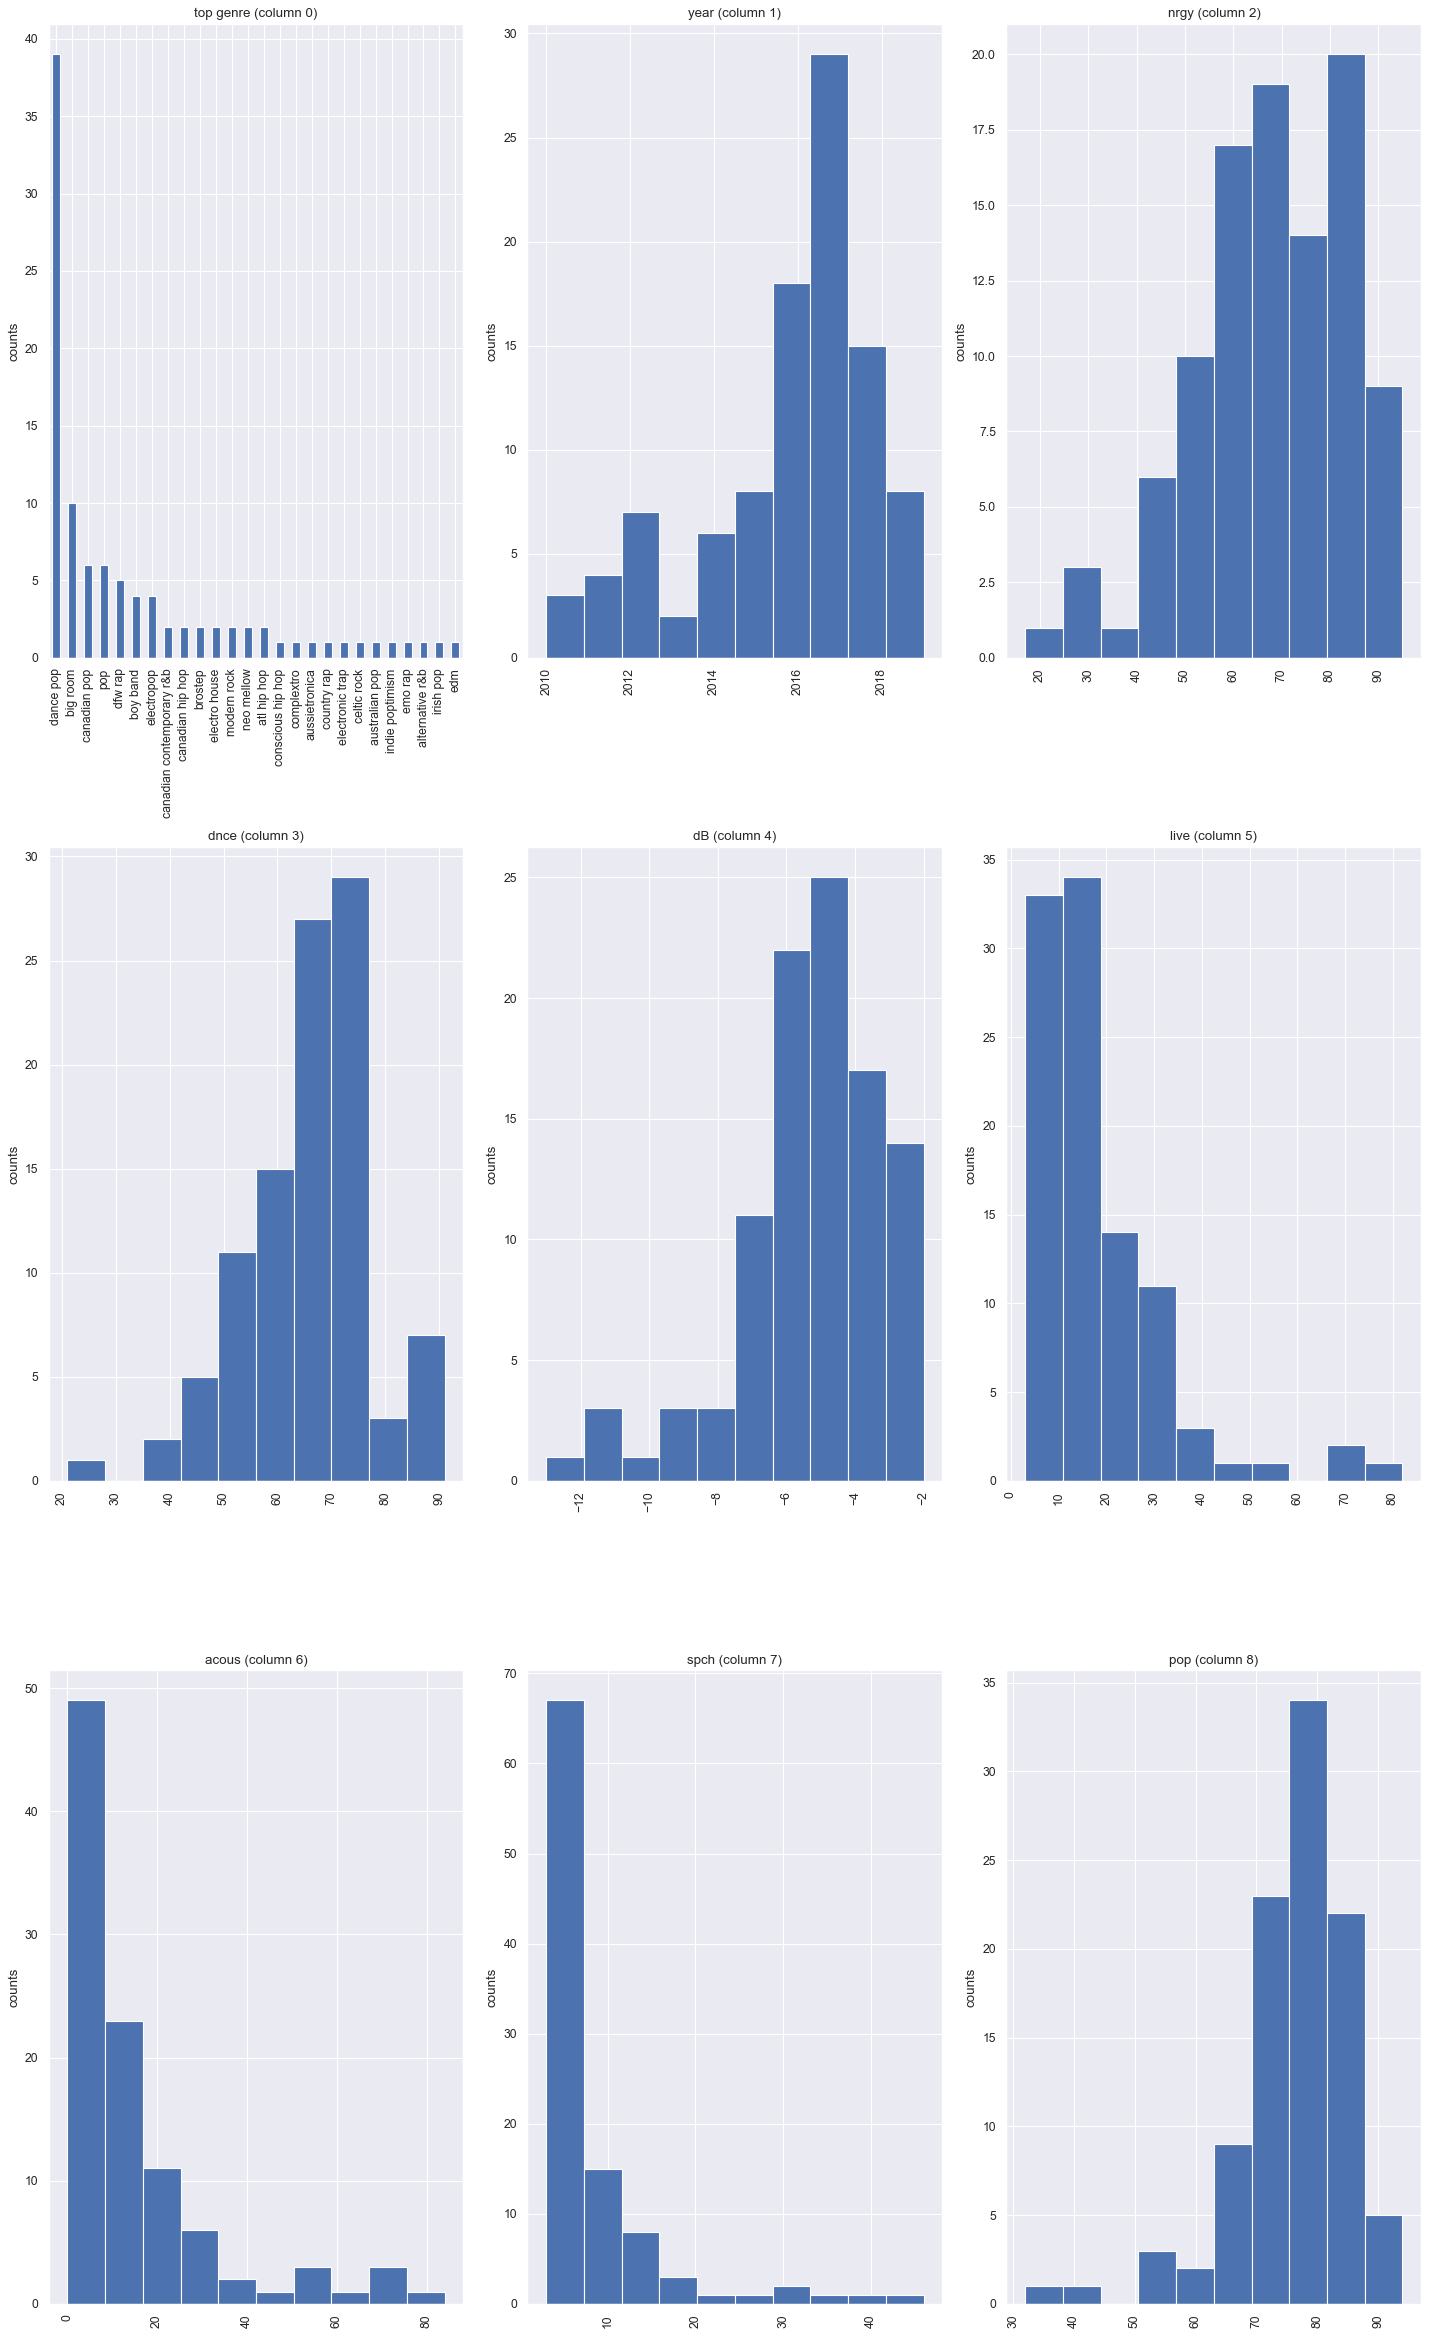

In [81]:
plotPerColumnDistribution(df_2010,nGraphShown=15,nGraphPerRow=3)

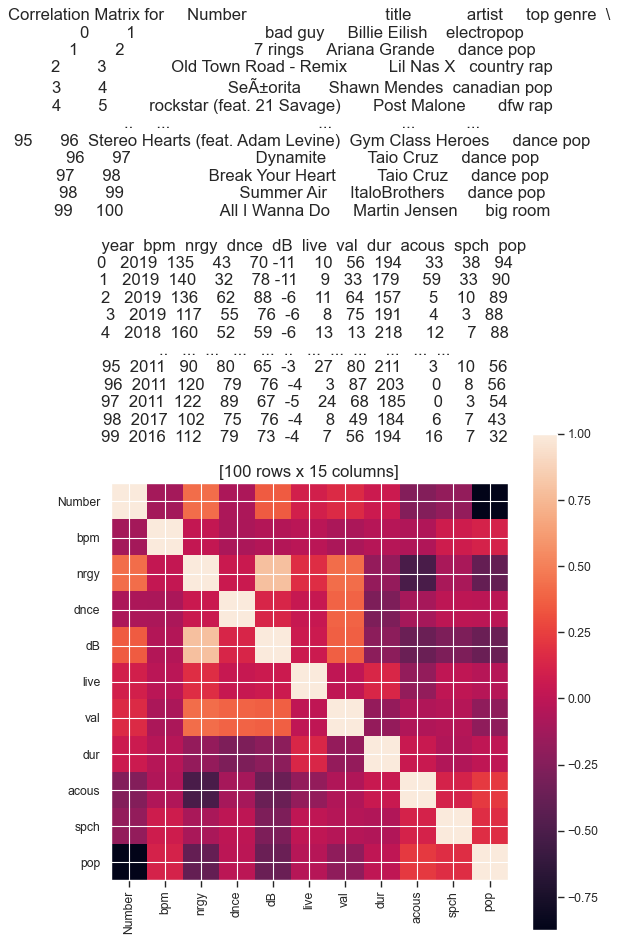

In [82]:
plotCorrelationMatrix(df_2010, 8)

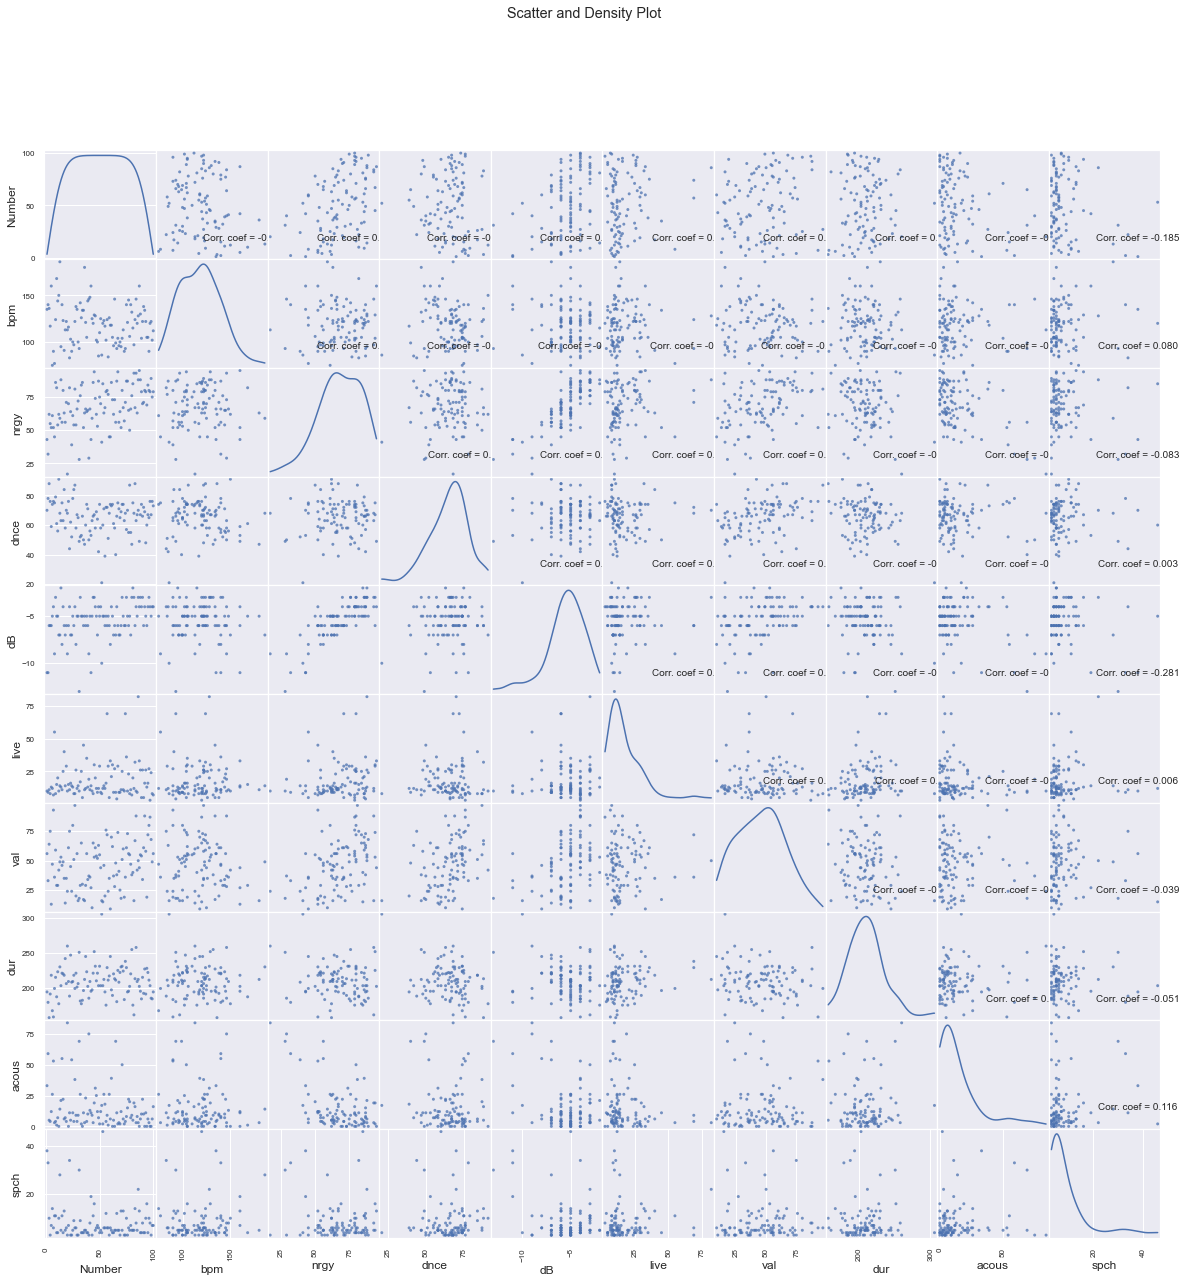

In [83]:
#Scatter and density plots
plotScatterMatrix(df_2010, plotSize=20, textSize=10)

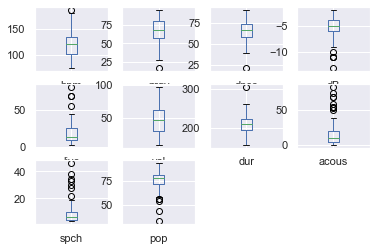

In [84]:
from matplotlib import pyplot
df_2010[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']].plot(kind='box',subplots=True,layout=(3,4))
pyplot.show()

# Prepare the Data for Machine Learning


In [3]:
#let's transform the values of column 'year'
df_1950['year']='fifties'
df_1950.head()

Number                                              title  \
0      1                       Put Your Head On My Shoulder   
1      2  Whatever Will Be Will Be (Que Sera Sera) (with...   
2      3                           Everybody Loves Somebody   
3      4        Take Good Care Of My Baby - 1990 Remastered   
4      5                                 A Teenager In Love   

                artist        top genre     year    bpm  nrgy  dnce    dB  \
0            Paul Anka  adult standards  fifties  116.0  34.0  55.0  -9.0   
1            Doris Day  adult standards  fifties  177.0  34.0  42.0 -11.0   
2          Dean Martin  adult standards  fifties   81.0  49.0  26.0  -9.0   
3            Bobby Vee  adult standards  fifties   82.0  43.0  49.0 -12.0   
4  Dion & The Belmonts  adult standards  fifties   79.0  38.0  56.0  -9.0   

   live   val    dur  acous  spch   pop  
0  10.0  47.0  155.0   75.0   3.0  72.0  
1  72.0  78.0  123.0   86.0   4.0  62.0  
2  34.0  40.0  162.0   81.0   4.0  61.0  
3  12.0  66.0  151.0   70.0   6.0  60.0  
4  13.0  62.0  158.0   67.0   3.0  60.0

In [4]:
df_1960['year']='sixties'

In [5]:
df_1970['year']='seventies'
df_1980['year']='eighties'
df_1990['year']='nineties'
df_2000['year']='twenties'
df_2010['year']='twenties_10'

In [6]:
df_1980.head()

Number                                         title           artist  \
0      1                            Livin' On A Prayer         Bon Jovi   
1      2                                        Africa             TOTO   
2      3  Another One Bites The Dust - Remastered 2011            Queen   
3      4                               Break My Stride   Matthew Wilder   
4      5    I Wanna Dance with Somebody (Who Loves Me)  Whitney Houston   

      top genre      year    bpm  nrgy  dnce    dB  live   val    dur  acous  \
0    glam metal  eighties  123.0  89.0  53.0  -4.0  29.0  80.0  249.0    8.0   
1    album rock  eighties   93.0  37.0  67.0 -18.0   5.0  73.0  296.0   26.0   
2     glam rock  eighties  110.0  53.0  93.0  -6.0  16.0  75.0  215.0   11.0   
3  new wave pop  eighties  110.0  59.0  92.0 -11.0   9.0  83.0  184.0   20.0   
4     dance pop  eighties  119.0  82.0  71.0  -9.0   9.0  87.0  291.0   21.0   

   spch   pop  
0   3.0  83.0  
1   3.0  83.0  
2  16.0  82.0  
3   6.0  81.0  
4   5.0  80.0

## Let's check duplicated values for each dataset 
after reviewing the datasets, we observe that none of them have duplicated rows.

In [89]:
# calculate duplicate
dups=df_2010.duplicated()

# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_2010[dups])

False
Empty DataFrame
Columns: [Number, title, artist, top genre, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop]
Index: []


In [90]:
df_1950_duplicate=df_1950[df_1950.duplicated()]
print('Duplicate Rows:')
df_1950_duplicate

Duplicate Rows:


Empty DataFrame
Columns: [Number, title, artist, top genre, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop]
Index: []

In [91]:
df_2010_duplicate=df_2010[df_2010.duplicated()]
print('Duplicate Rows:')
df_2010_duplicate

Duplicate Rows:


Empty DataFrame
Columns: [Number, title, artist, top genre, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop]
Index: []

# Let's merge the datasets

In [3]:
df=pd.concat([df_1950,df_1960,df_1970,df_1980,df_1990,df_2000,df_2010],axis=0,ignore_index=True)

In [4]:
nRowsRead=1000
nRow,nCol=df.shape
print(f'There are {nRow} rows and {nCol} columns in df')

There are 667 rows and 15 columns in df


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     667 non-null    object 
 1   title      657 non-null    object 
 2   artist     657 non-null    object 
 3   top genre  641 non-null    object 
 4   year       667 non-null    object 
 5   bpm        657 non-null    float64
 6   nrgy       657 non-null    float64
 7   dnce       657 non-null    float64
 8   dB         657 non-null    float64
 9   live       657 non-null    float64
 10  val        657 non-null    float64
 11  dur        657 non-null    float64
 12  acous      657 non-null    float64
 13  spch       657 non-null    float64
 14  pop        657 non-null    float64
dtypes: float64(10), object(5)
memory usage: 78.3+ KB


In [10]:
df.isnull().sum()

Number        0
title        10
artist       10
top genre    26
year          0
bpm          10
nrgy         10
dnce         10
dB           10
live         10
val          10
dur          10
acous        10
spch         10
pop          10
dtype: int64

In [11]:
# calculate duplicate
dupl=df.duplicated()

# report if there are any duplicates
print(dupl.any())
# list all duplicate rows
print(df[dupl])

False
Empty DataFrame
Columns: [Number, title, artist, top genre, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop]
Index: []


We observe that there are no duplicated rows in our new dataset df

In [5]:
df.describe()

year         bpm        nrgy        dnce          dB  \
count   657.000000  657.000000  657.000000  657.000000  657.000000   
mean   1994.958904  118.975647   61.663623   60.438356   -8.304414   
std      17.870891   24.815097   21.664806   15.010451    3.639451   
min    1945.000000   62.000000    6.000000   18.000000  -24.000000   
25%    1979.000000  101.000000   45.000000   51.000000  -10.000000   
50%    1999.000000  120.000000   65.000000   62.000000   -8.000000   
75%    2010.000000  134.000000   79.000000   71.000000   -6.000000   
max    2019.000000  199.000000  100.000000   96.000000   -1.000000   

             live         val         dur       acous        spch         pop  
count  657.000000  657.000000  657.000000  657.000000  657.000000  657.000000  
mean    18.269406   57.700152  223.937595   29.659056    6.182648   63.365297  
std     14.447092   24.232736   59.789627   28.839115    6.179737   13.766250  
min      2.000000    6.000000   98.000000    0.000000    2.000000   26.000000  
25%      9.000000   39.000000  185.000000    6.000000    3.000000   56.000000  
50%     13.000000   58.000000  217.000000   19.000000    4.000000   66.000000  
75%     24.000000   78.000000  254.000000   51.000000    6.000000   74.000000  
max     93.000000   99.000000  511.000000  100.000000   47.000000   94.000000

In [6]:
df.corr()

year       bpm      nrgy      dnce        dB      live       val  \
year   1.000000 -0.020469  0.197182  0.273014  0.429701 -0.002443 -0.089156   
bpm   -0.020469  1.000000  0.183930 -0.054160  0.053373  0.008718  0.098052   
nrgy   0.197182  0.183930  1.000000  0.324332  0.700826  0.125346  0.401258   
dnce   0.273014 -0.054160  0.324332  1.000000  0.290109 -0.076344  0.453835   
dB     0.429701  0.053373  0.700826  0.290109  1.000000  0.074361  0.129790   
live  -0.002443  0.008718  0.125346 -0.076344  0.074361  1.000000  0.057672   
val   -0.089156  0.098052  0.401258  0.453835  0.129790  0.057672  1.000000   
dur   -0.100516  0.028222  0.128047  0.052417  0.022309 -0.071867 -0.111051   
acous -0.241812 -0.172204 -0.662695 -0.379706 -0.502756 -0.049150 -0.192690   
spch   0.191422  0.053867  0.173948  0.203849  0.195373  0.084666  0.058990   
pop    0.163923  0.062704  0.270046  0.250407  0.362588 -0.039893 -0.100271   

            dur     acous      spch       pop  
year  -0.100516 -0.241812  0.191422  0.163923  
bpm    0.028222 -0.172204  0.053867  0.062704  
nrgy   0.128047 -0.662695  0.173948  0.270046  
dnce   0.052417 -0.379706  0.203849  0.250407  
dB     0.022309 -0.502756  0.195373  0.362588  
live  -0.071867 -0.049150  0.084666 -0.039893  
val   -0.111051 -0.192690  0.058990 -0.100271  
dur    1.000000 -0.222467  0.039267  0.275671  
acous -0.222467  1.000000 -0.167607 -0.455882  
spch   0.039267 -0.167607  1.000000  0.192720  
pop    0.275671 -0.455882  0.192720  1.000000

## Correlation comments
nrgy is highly correlated with dB and acous
dnce is moderately correlated with val
dB is moderately correlated with acous

In [99]:
# let's check the skewness
df.skew()

bpm      0.349932
nrgy    -0.415616
dnce    -0.253845
dB      -0.810858
live     2.143208
val     -0.177182
dur      0.980974
acous    0.846275
spch     3.603035
pop     -0.678326
dtype: float64

## Interpret the skewness¶¶¶
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical: bpm, nrgy, dnce, val

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed: dB, dur, acous, pop

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed: live, spch

# Distribution graphs (histogram/bar graph) of sampled columns:¶

C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Camoens\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


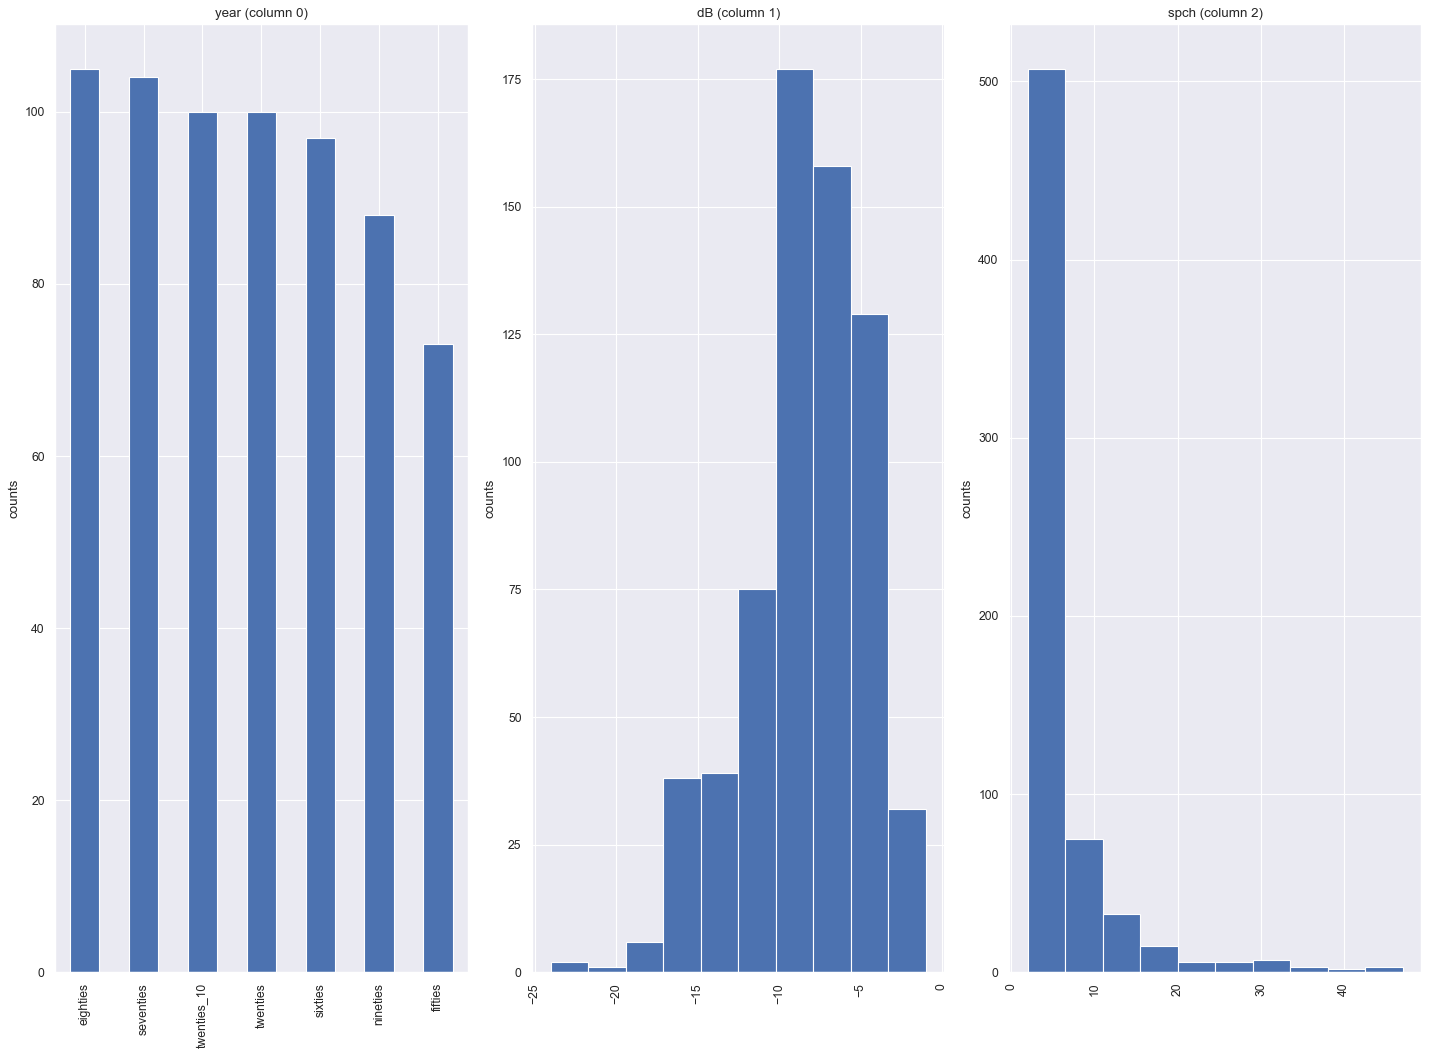

In [100]:
plotPerColumnDistribution(df,nGraphShown=15,nGraphPerRow=3)

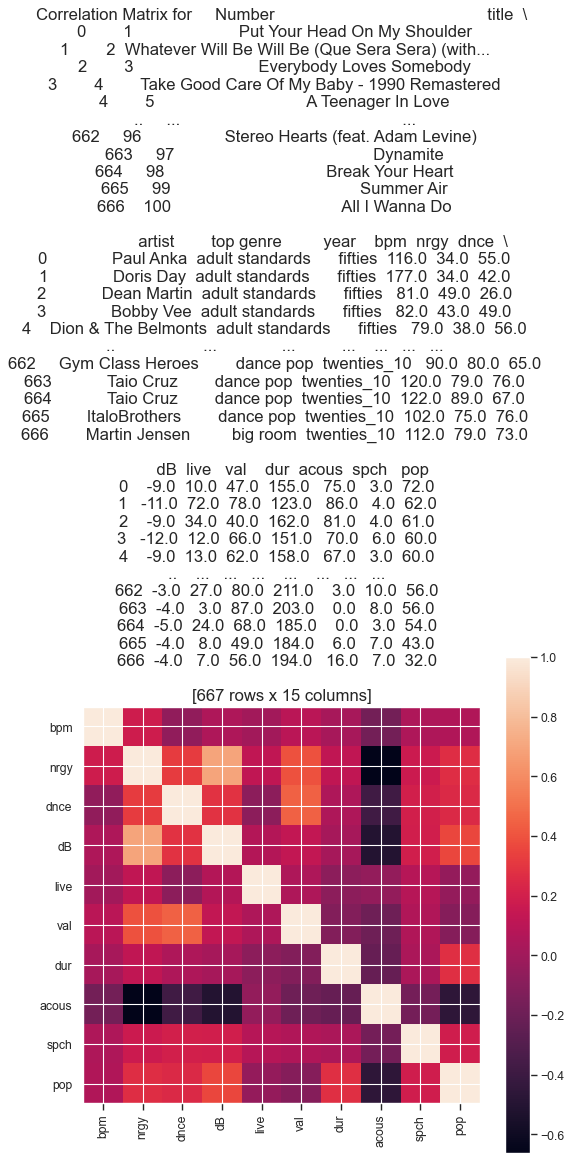

In [101]:
plotCorrelationMatrix(df, 8)

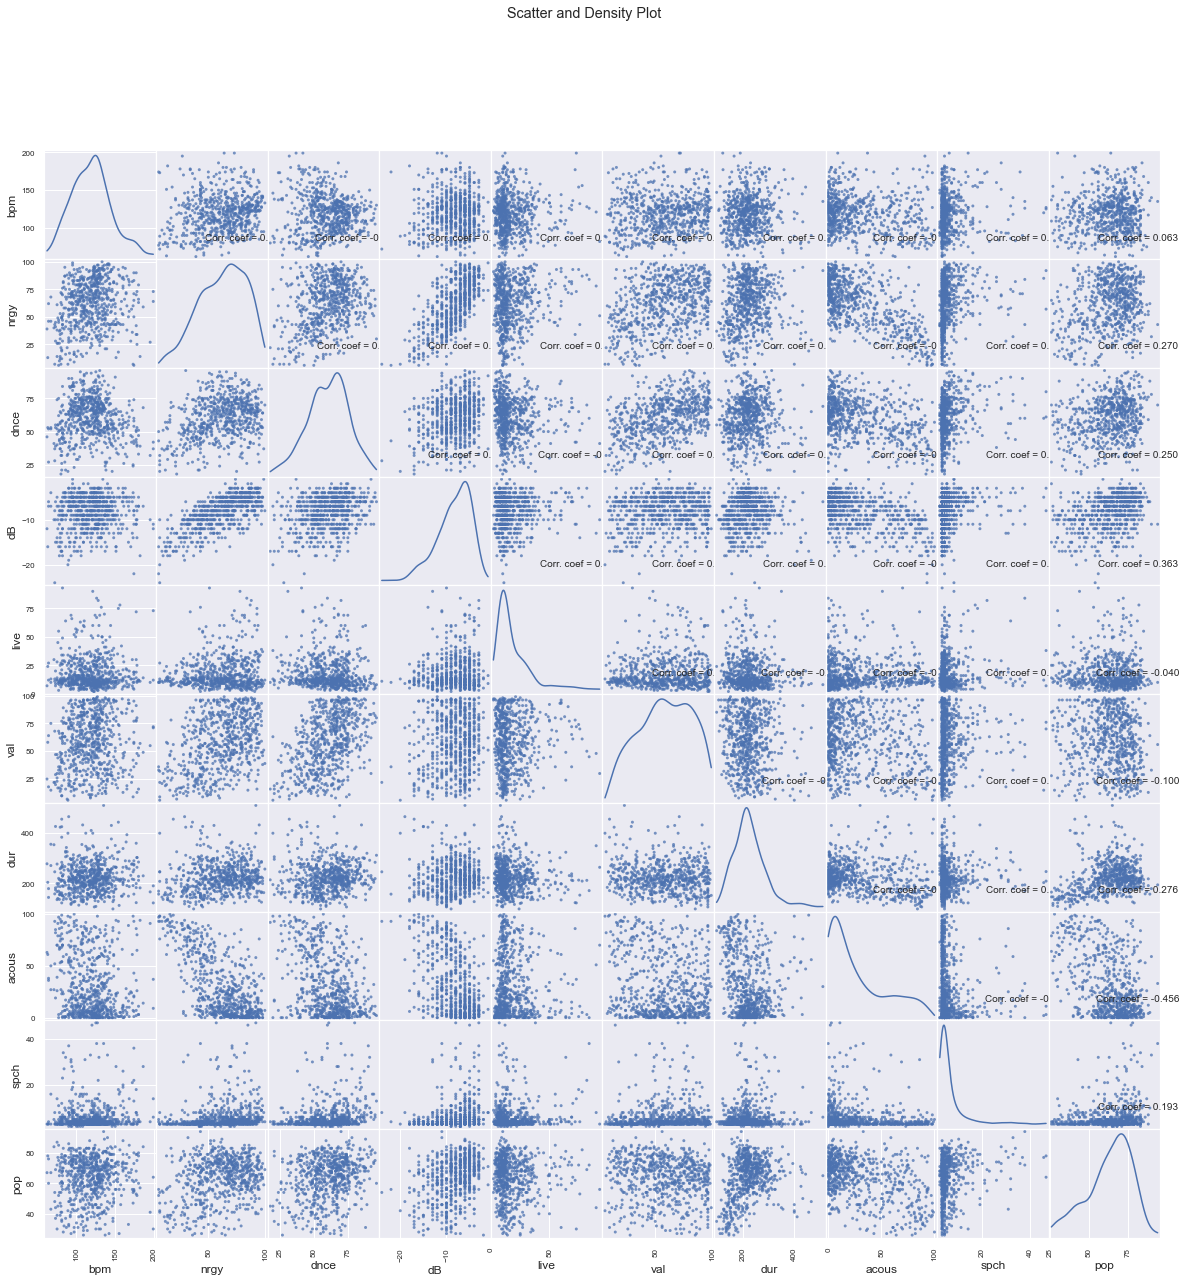

In [102]:
#Scatter and density plots
plotScatterMatrix(df, plotSize=20, textSize=10)

# Imputing missing values before merging the datasets

## Univariate feature imputation

In [7]:
# we will first set up a new data frame with the features which will be used in the model
df_new=df.drop(['Number','title','artist'], axis=1)
df_new.head()

top genre    year    bpm  nrgy  dnce    dB  live   val    dur  acous  \
0  adult standards  2000.0  116.0  34.0  55.0  -9.0  10.0  47.0  155.0   75.0   
1  adult standards  1948.0  177.0  34.0  42.0 -11.0  72.0  78.0  123.0   86.0   
2  adult standards  2013.0   81.0  49.0  26.0  -9.0  34.0  40.0  162.0   81.0   
3  adult standards  2011.0   82.0  43.0  49.0 -12.0  12.0  66.0  151.0   70.0   
4  adult standards  1959.0   79.0  38.0  56.0  -9.0  13.0  62.0  158.0   67.0   

   spch   pop  
0   3.0  72.0  
1   4.0  62.0  
2   4.0  61.0  
3   6.0  60.0  
4   3.0  60.0

In [8]:
df_new.columns

Index(['top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop'],
      dtype='object')

In [9]:
df_new.shape

(667, 12)

In [45]:
(df_new['top genre']=='poppop').unique()

array([False,  True])

In [10]:
df_new['top genre'].unique()

array(['adult standards', 'brill building pop', 'doo-wop',
       'deep adult standards', 'british comedy', nan, 'classic soul',
       'british dance band', 'merseybeat', 'yodeling', 'classic uk pop',
       'british invasion', 'album rock', 'baroque pop', 'blues rock',
       'art rock', 'rock-and-roll', 'chanson', 'australian rock',
       'classic rock', 'canadian folk', 'alternative country',
       'acoustic blues', 'art pop', 'classic girl group', 'bubblegum pop',
       'blues', 'american folk revival', 'bebop', 'beach music',
       'appalachian folk', 'cowboy western', 'drone folk', 'british folk',
       'boogaloo', 'avant-garde jazz', 'afropop', 'british blues',
       'afrobeat', 'australian talent show', 'glam rock', 'europop',
       'hollywood', 'soft rock', 'pop', 'disco', 'country', 'dance rock',
       'classic country pop', 'chicago soul', 'brit funk', 'country rock',
       'dance pop', 'native american', 'glam metal', 'new wave pop',
       'mellow gold', 'hi-nrg'

In [11]:
df_new.replace(to_replace=['deep adult standards','adult standards'],value=['adult','adult'],inplace=True)

In [12]:
df_new.replace(to_replace=['brill building pop', 'doo-wop', 'dance pop','classic uk pop', 'baroque pop',
  'art pop', 'bebop', 'bubblegum pop', 'afropop', 'pop',
   'europop', 'classic country pop', 'new wave pop', 'bow pop', 'classic danish pop',
    'britpop',
   'canadian pop', 'italian pop', 'barbadian pop', 'electropop', 'belgian pop',
   'hip pop', 'irish pop', 'australian pop'], value=['pop','pop','pop','pop','pop','pop','pop','pop','pop','pop',
                                                    'pop','pop','pop','pop','pop','pop','pop','pop',
                                                    'pop','pop','pop','pop','pop','pop'],inplace=True)

In [13]:
df_new.replace(to_replace=['blues rock', 'art rock', 'rock-and-roll', 'chanson','australian rock', 'classic rock',
   'glam rock', 'soft rock', 'country rock', 'german alternative rock', 'celtic rock',
'album rock', 'modern rock', 'alternative rock','dance rock'],value=['rock','rock','rock','rock','rock',
                                                                     'rock','rock','rock','rock','rock',
                                                                    'rock','rock','rock','rock','rock'], inplace=True)

In [14]:
df_new.replace(to_replace=['classic soul', 'classic girl group'],value=['classic','classic'],inplace=True)

In [15]:
df_new.replace(to_replace=['acoustic blues', 'blues', 'british blues'],value=['blues','blues','blues'],inplace=True)

In [16]:
df_new.replace(to_replace=['canadian folk', 'american folk revival', 'appalachian folk',
                                         'drone folk', 'british folk'],value=['folk','folk','folk','folk','folk'],inplace=True)

In [17]:
df_new.replace(to_replace=['hip hop', 'canadian hip hop', 'conscious hip hop', 'detroit hip hop','bronx hip hop', 'atl hip hop', 'east coast hip hop',],
               value=['hip hop','hip hop','hip hop','hip hop','hip hop','hip hop','hip hop'], inplace=True)

In [18]:
df_new.replace(to_replace=['alternative country', 'country'],value=['country','country'],inplace=True)

In [19]:
df_new.replace(to_replace=['british dance band', 'boy band'],value=['band','band'],inplace=True)

In [20]:
df_new.replace(to_replace=['brit funk', 'g funk'],value=['funk','funk'],inplace=True)

In [21]:
df_new.replace(to_replace=['chicago rap', 'country rap', 'dfw rap', 'emo rap', 'dirty south rap'],
               value=['rap','rap','rap','rap','rap'],inplace=True)

In [22]:
df_new.replace(to_replace=['alternative r&b','canadian contemporary r&b'],value=['r&b','r&b'],inplace=True)

In [23]:
df_new.replace(to_replace=['deep house', 'disco house', 'electro house', 'disco','electronic trap','chicago soul','avant-garde jazz'],
               value=['house','house','house','house','house','house','house'],inplace=True)

In [24]:
df_new.replace(to_replace=['german dance', 'bubble trance', 'belgian dance','bubblegum dance','eurodance'],
               value=['dance','dance','dance','dance','dance'],inplace=True)

In [25]:
df_new.replace(to_replace=['british comedy','merseybeat', 'yodeling','british invasion','beach music','cowboy western',
   'boogaloo','afrobeat', 'australian talent show','hollywood','native american', 'glam metal',
   'mellow gold','hi-nrg', 'glam punk','neo mellow', 'big beat', 'alternative metal',
   'permanent wave','latin','big room','uk garage','brostep','complextro', 'edm','indie poptimism','aussietronica','jazz'],
               value=['other','other','other','other','other','other','other','other','other',
                     'other','other','other','other','other','other','other','other','other',
                     'other','other','other','other','other','other','other','other','other','other'],inplace=True)

In [26]:
#let's impute both numerical and categorical variables from df ['top genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

X=df_new 
xt= DataFrameImputer().fit_transform(X)

print('before...')
print(X)
print('after...')
print(xt)

before...
    top genre    year    bpm  nrgy  dnce    dB  live   val    dur  acous  \
0       adult  2000.0  116.0  34.0  55.0  -9.0  10.0  47.0  155.0   75.0   
1       adult  1948.0  177.0  34.0  42.0 -11.0  72.0  78.0  123.0   86.0   
2       adult  2013.0   81.0  49.0  26.0  -9.0  34.0  40.0  162.0   81.0   
3       adult  2011.0   82.0  43.0  49.0 -12.0  12.0  66.0  151.0   70.0   
4       adult  1959.0   79.0  38.0  56.0  -9.0  13.0  62.0  158.0   67.0   
..        ...     ...    ...   ...   ...   ...   ...   ...    ...    ...   
662       pop  2011.0   90.0  80.0  65.0  -3.0  27.0  80.0  211.0    3.0   
663       pop  2011.0  120.0  79.0  76.0  -4.0   3.0  87.0  203.0    0.0   
664       pop  2011.0  122.0  89.0  67.0  -5.0  24.0  68.0  185.0    0.0   
665       pop  2017.0  102.0  75.0  76.0  -4.0   8.0  49.0  184.0    6.0   
666     other  2016.0  112.0  79.0  73.0  -4.0   7.0  56.0  194.0   16.0   

     spch   pop  
0     3.0  72.0  
1     4.0  62.0  
2     4.0  61.0  
3    

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

In [27]:
xt.head()

top genre    year    bpm  nrgy  dnce    dB  live   val    dur  acous  spch  \
0     adult  2000.0  116.0  34.0  55.0  -9.0  10.0  47.0  155.0   75.0   3.0   
1     adult  1948.0  177.0  34.0  42.0 -11.0  72.0  78.0  123.0   86.0   4.0   
2     adult  2013.0   81.0  49.0  26.0  -9.0  34.0  40.0  162.0   81.0   4.0   
3     adult  2011.0   82.0  43.0  49.0 -12.0  12.0  66.0  151.0   70.0   6.0   
4     adult  1959.0   79.0  38.0  56.0  -9.0  13.0  62.0  158.0   67.0   3.0   

    pop  
0  72.0  
1  62.0  
2  61.0  
3  60.0  
4  60.0

In [28]:
xt.describe()

year         bpm        nrgy        dnce          dB  \
count   667.000000  667.000000  667.000000  667.000000  667.000000   
mean   1994.958904  118.975647   61.663623   60.438356   -8.304414   
std      17.736217   24.628093   21.501542   14.897334    3.612025   
min    1945.000000   62.000000    6.000000   18.000000  -24.000000   
25%    1980.000000  102.000000   46.000000   51.000000  -10.000000   
50%    1998.000000  119.000000   64.000000   62.000000   -8.000000   
75%    2010.000000  133.000000   79.000000   71.000000   -6.000000   
max    2019.000000  199.000000  100.000000   96.000000   -1.000000   

             live         val         dur       acous        spch         pop  
count  667.000000  667.000000  667.000000  667.000000  667.000000  667.000000  
mean    18.269406   57.700152  223.937595   29.659056    6.182648   63.365297  
std     14.338220   24.050121   59.339058   28.621786    6.133167   13.662509  
min      2.000000    6.000000   98.000000    0.000000    2.000000   26.000000  
25%      9.000000   39.500000  186.000000    6.000000    3.000000   56.000000  
50%     13.000000   58.000000  219.000000   19.000000    4.000000   66.000000  
75%     24.000000   78.000000  254.000000   51.000000    6.000000   73.000000  
max     93.000000   99.000000  511.000000  100.000000   47.000000   94.000000

In [29]:
xt.loc[xt['pop']<66,'pop']=0
#xt.loc[(xt['pop']>=50) & (xt['pop'] <72),'pop']=1
xt.loc[xt['pop']>=66,'pop']=1
xt

top genre    year    bpm  nrgy  dnce    dB  live   val    dur  acous  \
0       adult  2000.0  116.0  34.0  55.0  -9.0  10.0  47.0  155.0   75.0   
1       adult  1948.0  177.0  34.0  42.0 -11.0  72.0  78.0  123.0   86.0   
2       adult  2013.0   81.0  49.0  26.0  -9.0  34.0  40.0  162.0   81.0   
3       adult  2011.0   82.0  43.0  49.0 -12.0  12.0  66.0  151.0   70.0   
4       adult  1959.0   79.0  38.0  56.0  -9.0  13.0  62.0  158.0   67.0   
..        ...     ...    ...   ...   ...   ...   ...   ...    ...    ...   
662       pop  2011.0   90.0  80.0  65.0  -3.0  27.0  80.0  211.0    3.0   
663       pop  2011.0  120.0  79.0  76.0  -4.0   3.0  87.0  203.0    0.0   
664       pop  2011.0  122.0  89.0  67.0  -5.0  24.0  68.0  185.0    0.0   
665       pop  2017.0  102.0  75.0  76.0  -4.0   8.0  49.0  184.0    6.0   
666     other  2016.0  112.0  79.0  73.0  -4.0   7.0  56.0  194.0   16.0   

     spch  pop  
0     3.0  1.0  
1     4.0  0.0  
2     4.0  0.0  
3     6.0  0.0  
4     3.0  0.0  
..    ...  ...  
662  10.0  0.0  
663   8.0  0.0  
664   3.0  0.0  
665   7.0  0.0  
666   7.0  0.0  

[667 rows x 12 columns]

In [ ]:
#xt.loc[xt['pop']<50,'pop']=0
#xt.loc[(xt['pop']>=50) & (xt['pop'] <72),'pop']=1
#xt.loc[xt['pop']>=50,'pop']=1
#xt

In [30]:
print(xt.groupby('pop').size())

pop
0.0    330
1.0    337
dtype: int64


In [31]:
df_new.isnull().sum()

top genre    26
year          0
bpm          10
nrgy         10
dnce         10
dB           10
live         10
val          10
dur          10
acous        10
spch         10
pop          10
dtype: int64

In [31]:
xt.isnull().sum()

top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [32]:
xt['top genre'].value_counts().to_frame()

top genre
pop                 235
rock                147
adult                98
other                60
hip hop              26
dance                23
house                20
band                 16
rap                  10
folk                  6
classic               6
funk                  5
british soul          5
r&b                   4
country               3
blues                 3

In [33]:
xt.replace(to_replace=['other', 'classic', 'band', 'folk',
       'country', 'blues', 'house', 'funk', 'dance', 'hip hop',
       'british soul','rap', 'r&b'],
               value=['others','others','others','others','others','others','others','others',
                     'others','others','others','others','others'],inplace=True)

In [34]:
xt['top genre'].unique()

array(['adult', 'pop', 'others', 'rock'], dtype=object)

In [35]:
xt['top genre'].value_counts().to_frame()

top genre
pop           235
others        187
rock          147
adult          98

In [130]:
xt.head()

top genre     year    bpm  nrgy  dnce    dB  live   val    dur  acous  spch  \
0     adult  fifties  116.0  34.0  55.0  -9.0  10.0  47.0  155.0   75.0   3.0   
1     adult  fifties  177.0  34.0  42.0 -11.0  72.0  78.0  123.0   86.0   4.0   
2     adult  fifties   81.0  49.0  26.0  -9.0  34.0  40.0  162.0   81.0   4.0   
3     adult  fifties   82.0  43.0  49.0 -12.0  12.0  66.0  151.0   70.0   6.0   
4     adult  fifties   79.0  38.0  56.0  -9.0  13.0  62.0  158.0   67.0   3.0   

   pop  
0  1.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

## Let's proceed with feature selection
in our case we decide to use SUpervised selection, in a sense that we will use the target variable (pop for popularity), such as methods that remove irrelevant variables.

### Decision on wether we will select features before or after data transform
As we can see in our transformed dataset xt, we have only 12 features, which mean we probably don't need to make feature selection, however, the categorical values such as top genre and year, will need to be encode which will raise the number of features. We think it is important to first encode those 2 variables and scaled our data and perform feature selection after while. 

# Data transform
We gonna encode the categorical variables and scale the numerical variables.

## Validation Dataset
We will use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We will use it at the end of our project to confirm the accuracy of our final model. It is a smoke test data we can use to see if we messed up and give us confidence on our estimates of accuracy on unseen data.
We will use 80% of the dataset for modeling and hold back 20% for validation.

In [36]:
# Split-out validation dataset
#array=xt.values
X=xt.iloc[:,0:11]
Y=xt.iloc[:,11]
validation_size=0.2
seed=7
X_train, X_validation, Y_train, Y_validation=train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape,Y_train.shape,X_validation.shape,Y_validation.shape)

(533, 11) (533,) (134, 11) (134,)


In [37]:
X_train

top genre         year         bpm       nrgy       dnce         dB  \
108       pop  1994.958904  118.975647  61.663623  60.438356  -8.304414   
358     adult  1980.000000  153.000000  72.000000  50.000000  -8.000000   
324       pop  1981.000000  160.000000  78.000000  56.000000  -4.000000   
3       adult  2011.000000   82.000000  43.000000  49.000000 -12.000000   
239     adult  1974.000000  138.000000  32.000000  26.000000 -12.000000   
..        ...          ...         ...        ...        ...        ...   
579    others  2016.000000  186.000000  59.000000  68.000000  -7.000000   
502       pop  2009.000000  139.000000  70.000000  72.000000  -5.000000   
537       pop  2003.000000  110.000000  65.000000  80.000000  -7.000000   
196      rock  1972.000000  125.000000  63.000000  72.000000 -11.000000   
175    others  1970.000000  143.000000  40.000000  44.000000  -8.000000   

          live        val         dur      acous       spch  
108  18.269406  57.700152  223.937595  29.659056   6.182648  
358  35.000000  88.000000  324.000000  24.000000   5.000000  
324  12.000000  31.000000  206.000000  10.000000   5.000000  
3    12.000000  66.000000  151.000000  70.000000   6.000000  
239  13.000000  17.000000  211.000000  89.000000   3.000000  
..         ...        ...         ...        ...        ...  
579  14.000000  49.000000  230.000000  14.000000  28.000000  
502   9.000000  24.000000  224.000000   7.000000   6.000000  
537   4.000000  82.000000  215.000000   5.000000   4.000000  
196  13.000000  83.000000  187.000000  40.000000   6.000000  
175  11.000000  41.000000  243.000000  63.000000   3.000000  

[533 rows x 11 columns]

In [38]:
Y_train

108    0.0
358    0.0
324    1.0
3      0.0
239    0.0
      ... 
579    1.0
502    1.0
537    1.0
196    1.0
175    1.0
Name: pop, Length: 533, dtype: float64

In [166]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define which columns should be encoded vs scaled
columns_to_encode = ['top genre']
columns_to_scale  = ['bpm', 'nrgy','dnce','dB','live','val','dur','acous','spch']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(X_train[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(X_train[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_train_processed = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [39]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Define which columns should be encoded vs scaled
columns_to_encode = ['top genre']
columns_to_scale  = ['bpm', 'nrgy','dnce','dB','live','val','dur','acous','spch']

# Instantiate encoder/scaler
robust = RobustScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = robust.fit_transform(X_train[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(X_train[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_train_processed = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [ ]:
# try Normal scaler
#from sklearn.preprocessing import RobustScaler

#transformer = RobustScaler().fit(X)
#transformer
#RobustScaler()

In [52]:
scaled_columns.shape

(533, 9)

In [53]:
print(X_train_processed[0])

[-7.61035008e-04 -6.87169845e-02  0.00000000e+00 -7.61035008e-02
  3.76386171e-01 -7.68840495e-03  8.60521033e-02  2.26788432e-01
  7.27549467e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [137]:
X_train_processed

array([[ 0.424412  , -0.15826739,  2.05894566, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.38368943,  1.09796293,  1.12133901, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62802489, -0.62353787,  0.51859189, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.34931697,  0.16742195,  1.32225472, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26152169,  0.07436786,  0.7864795 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.99452809, -0.99575426, -1.08873379, ...,  1.        ,
         0.        ,  0.        ]])

In [54]:
X_train_processed_df=pd.DataFrame(X_train_processed)

In [55]:
X_train_processed_df.head()

0         1         2         3         4         5         6  \
0 -0.000761 -0.068717  0.000000 -0.076104  0.376386 -0.007688  0.086052   
1  1.062500  0.235294 -0.549387  0.000000  1.571429  0.769231  1.536232   
2  1.281250  0.411765 -0.233598  1.000000 -0.071429 -0.692308 -0.173913   
3 -1.156250 -0.617647 -0.602019 -1.000000 -0.071429  0.205128 -0.971014   
4  0.593750 -0.941176 -1.812545 -1.000000  0.000000 -1.051282 -0.101449   

          7         8    9   10   11   12   13  
0  0.226788  0.727549  0.0  0.0  1.0  0.0  0.0  
1  0.106383  0.333333  1.0  0.0  0.0  0.0  0.0  
2 -0.191489  0.333333  0.0  0.0  1.0  0.0  0.0  
3  1.085106  0.666667  1.0  0.0  0.0  0.0  0.0  
4  1.489362 -0.333333  1.0  0.0  0.0  0.0  0.0

In [56]:
X_train_processed.shape

(533, 14)

## Let's process with the validation dataset X_validation

In [57]:
X_validation.shape

(134, 11)

In [172]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define which columns should be encoded vs scaled
columns_to_encode = ['top genre']
columns_to_scale  = ['bpm', 'nrgy','dnce','dB','live','val','dur','acous','spch']

# Instantiate encoder/scaler
#scaler = StandardScaler()
#ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.transform(X_validation[columns_to_scale]) 
encoded_columns =    ohe.transform(X_validation[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_validation_processed = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [40]:
#from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Define which columns should be encoded vs scaled
columns_to_encode = ['top genre']
columns_to_scale  = ['bpm', 'nrgy','dnce','dB','live','val','dur','acous','spch']

# Instantiate encoder/scaler
#scaler = StandardScaler()
#ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = robust.transform(X_validation[columns_to_scale]) 
encoded_columns =    ohe.transform(X_validation[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_validation_processed = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [41]:
ohe.categories_

[array(['adult', 'others', 'pop', 'rock'], dtype=object)]

In [60]:
X_validation_processed

array([[ 0.125     ,  0.94117647, -0.33886085, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71875   ,  0.20588235, -0.02307138, ...,  0.        ,
         0.        ,  0.        ],
       [-0.21875   ,  0.44117647,  0.66113915, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.03125   ,  0.47058824, -1.39149243, ...,  0.        ,
         0.        ,  1.        ],
       [-0.4375    ,  0.79411765,  0.18745494, ...,  0.        ,
         0.        ,  0.        ],
       [-0.625     ,  0.44117647, -1.12833453, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
X_validation_processed.shape

(134, 14)

## Let's prepare the target variable on train and validation dataset

In [42]:
Y_train_enc, Y_validation_enc=Y_train.astype(int), Y_validation.astype(int)

In [65]:
Y_train_enc

108    0
358    0
324    1
3      0
239    0
      ..
579    1
502    1
537    1
196    1
175    1
Name: pop, Length: 533, dtype: int32

In [175]:
#prepare target
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OrdinalEncoder
#def prepare_targets(Y_train,Y_validation):
 #   le=LabelEncoder()
  #  le.fit(Y_train)
   # Y_train_enc=le.transform(Y_train)
    #Y_validation_enc=le.transform(Y_validation)
   # return Y_train_enc,Y_validation_enc

In [176]:
Y_train_enc, Y_validation_enc=prepare_targets(Y_train,Y_validation)

In [177]:
Y_train_enc

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

# Features selection on X_train_processed and X_validation_processed

## The ANOVA F-test

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature selection
def select_features(X_train,Y_train,X_validation):
    # configure to select all features
    fs=SelectKBest(score_func=f_classif, k='all')
    
    # learn relationship from training data
    fs.fit(X_train,Y_train)
    
    # Transform train input data
    X_train_fs=fs.transform(X_train)
    
    # Transform validation input data
    X_validation_fs=fs.transform(X_validation)
    
    return X_train_fs, X_validation_fs, fs

In [67]:
# feature selection
X_train_fs, X_validation_fs, fs=select_features(X_train_processed,Y_train_enc,X_validation_processed)
# what are the scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.035947
Feature 1: 15.058648
Feature 2: 22.745962
Feature 3: 54.832683
Feature 4: 1.589410
Feature 5: 8.144121
Feature 6: 17.175449
Feature 7: 76.187802
Feature 8: 8.633153
Feature 9: 26.674134
Feature 10: 3.382078
Feature 11: 2.151994
Feature 12: 1.011342
Feature 13: 0.760212


NameError: name 'pyplot' is not defined

## Feature score interpretation and selection based on the score
Based on the scores of each feature, we will rank them and decide which one to be chosed:
1. Feature 7
2. Feature 3
3. Feature 9
4. Feature 2
5. Feature 6
6. Feature 1
7. Feature 8
8. Feature 5
9. Feature 10
10. Feature 11
11. Feature 4
12. Feature 12
13. Feature 0

All features with a score less than 3 will not be selected, the following features will be dropped:
14. Feature 11
15. Feature 4
16. Feature 12
17. Feature 0


We will verify to which variables they correspond.

## RFE for Feature Selection
In order to select the most relevant feature in predicting our target variable 'popularity', we will use the Recursive Feature Elimination.
As we aim to automatically select the number of Features chosen by RFE, we will perform cross-validation evaluation of different numbers of features, and automatically selecting the number of features that resulted in the best mean score. We will refer to the RFECV class.

### Automatically Select the Number of Features

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std

# create pipeline
#rfe=RFECV(estimator=DecisionTreeClassifier())
#model= DecisionTreeClassifier()
#pipeline=Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
#cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
#n_scores=cross_val_score(pipeline,X_train_processed,Y_train_enc,scoring='accuracy',cv=cv,n_jobs=-1)

# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [45]:
# report which features were selected by RFE
rfe=RFECV(estimator=RandomForestClassifier())

# fit RFECV
rfe.fit(X_train_processed, Y_train_enc)

# summarize all features
for i in range(X_train_processed.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1


## Features importance

Feature: 0, Score: -0.05842
Feature: 1, Score: -0.86459
Feature: 2, Score: 0.44155
Feature: 3, Score: 0.76721
Feature: 4, Score: -0.11141
Feature: 5, Score: -0.69287
Feature: 6, Score: 0.21786
Feature: 7, Score: -1.19727
Feature: 8, Score: 0.05547
Feature: 9, Score: -0.23752
Feature: 10, Score: -0.05452
Feature: 11, Score: -0.05793
Feature: 12, Score: 0.34980


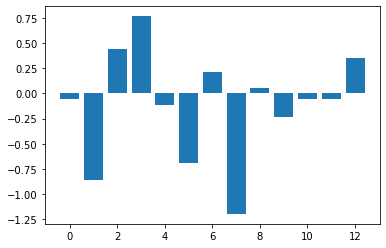

In [51]:
# logistic regression for feature importance
import matplotlib.pyplot as plt
modelf=LogisticRegression()
# fit the model
modelf.fit(X_train_processed,Y_train_enc)

#get importance
importance=modelf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.09024
Feature: 1, Score: 0.11109
Feature: 2, Score: 0.09144
Feature: 3, Score: 0.11231
Feature: 4, Score: 0.09135
Feature: 5, Score: 0.10895
Feature: 6, Score: 0.13894
Feature: 7, Score: 0.13911
Feature: 8, Score: 0.05965
Feature: 9, Score: 0.01771
Feature: 10, Score: 0.01492
Feature: 11, Score: 0.01062
Feature: 12, Score: 0.01366


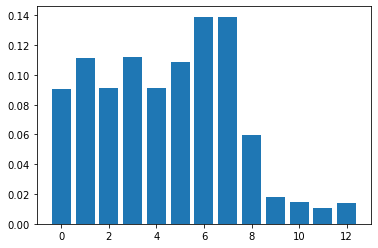

In [52]:
# random forest for feature importance on a classification problem
modelrf=RandomForestClassifier()
# fit the model
modelrf.fit(X_train_processed,Y_train_enc)

#get importance
importance=modelrf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:
X_train_selected=X_train_processed[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

#X_train_selected=X_train_processed[:,[0,1,2,3,5,6,7,8,9,15,16,18,20,22,23,24]]

In [54]:
X_validation_selected=X_validation_processed[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

#X_validation_selected=X_validation_processed[:,[0,1,2,3,5,6,7,8,9,15,16,18,20,22,23,24]]

# Step 4. Evaluate Algorithms

## Resampling method with k-fold cross validation
since we have a relatively small dataset the k-fold cross-validation can give a robust estimate of performance compared to the train and test split.

In [155]:
#X_train_selected=X_train_processed
#X_validation_selected=X_validation_processed

In [55]:
# let's merge train and test in one set
X_processed=np.concatenate((X_train_selected,X_validation_selected),axis=0)
Y_processed=np.concatenate((Y_train_enc,Y_validation_enc),axis=0)

In [157]:
# let's merge train and test in one set

#X_processed=np.concatenate((X_train_processed,X_validation_processed),axis=0)
#Y_processed=np.concatenate((Y_train_enc,Y_validation_enc),axis=0)

In [56]:
print(X_processed.shape)
print(Y_processed.shape)

(667, 13)
(667,)


In [59]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_processed, Y_processed)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [159]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
            dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted

# Test cross validation test harness
seed(1)

# evaluate algorithm
n_folds = 5
scores = evaluate_algorithm(dataset, zero_rule_algorithm_classification, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/len(scores)))

TypeError: 'int' object is not callable

In [60]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
model=LogisticRegression(solver='liblinear')
results=cross_val_score(model,X_processed,Y_processed, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 70.002% (6.869%)


In [61]:
model1=RandomForestClassifier()
results=cross_val_score(model1,X_processed,Y_processed, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 72.843% (5.290%)


In [62]:
model1.fit(X_train_processed,Y_train_enc)
result=model1.score(X_validation_processed,Y_validation_enc)
print('Accuracy: %.3f%% ' % (result*100.0))

Accuracy: 68.657% 


# Evaluation Metrics

## Classification accuracy
Classification accuracy is a ratio of the number of correct predictions out of all predictions that were made.

In [63]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
#model=LogisticRegression(solver='liblinear')

scoring='accuracy'
results=cross_val_score(model1,X_processed,Y_processed, cv=kfold,scoring=scoring)
print('Accuracy: %.3f (%.3f)' % (results.mean(), results.std()))

Accuracy: 0.724 (0.078)


## Logistic Loss
A performance metric for evaluationg the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

In [64]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
#model=LogisticRegression(solver='liblinear')
scoring='neg_log_loss'
results=cross_val_score(model1,X_processed,Y_processed, cv=kfold,scoring=scoring)
print('Logloss: %.3f (%.3f)' % (results.mean(), results.std()))

Logloss: -0.554 (0.060)


## Confusion Matrix 

In [65]:
from sklearn.metrics import confusion_matrix 
#model=LogisticRegression(solver='liblinear')
model1.fit(X_train_processed,Y_train_enc)
predicted=model1.predict(X_validation_processed)
matrix=confusion_matrix(Y_validation_enc,predicted)
print(matrix)

[[38 27]
 [16 53]]


In [66]:
from sklearn.metrics import classification_report 
#model=LogisticRegression(solver='liblinear')
model1.fit(X_train_processed,Y_train_enc)
predicted=model1.predict(X_validation_processed)
report=classification_report(Y_validation_enc,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.60      0.64        65
           1       0.67      0.75      0.71        69

    accuracy                           0.68       134
   macro avg       0.68      0.68      0.68       134
weighted avg       0.68      0.68      0.68       134



## Spot-Check Classification Algorithms
Spot-checking is a way of discovering which  algorithms perform well on your machine learning, as we cannotknow which algorithms are best suited to the problem beforehand.
What algorithms should I spot-check on my dataset?

### Evaluate Algorithms : Baseline
Let's design our test harness. We will use 10-fold cross-validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is.

In [67]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this classification problem. The six algorithms selected include:

- Linear Algorithms : Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
- Nonlinear Algorithms : Classification and Regression Trees (CART), Support Vector Machine (SVM), Gaussian Naive Bayes (NB), RandomForestClassification and k-Nearest Neighbors (KNN)

In [68]:
# Spot-Check Algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RDF',RandomForestClassifier()))

The algorithms all use default tuning parameters. Let's compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithm as we calculate it and collect the results for use later.

In [69]:
results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_processed, Y_train_enc, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.710587 (0.067936)
LDA: 0.710587 (0.068439)
kNN: 0.709015 (0.037108)
CART: 0.617121 (0.050828)
NB: 0.662055 (0.046518)
SVM: 0.708805 (0.062876)
RDF: 0.740671 (0.068160)


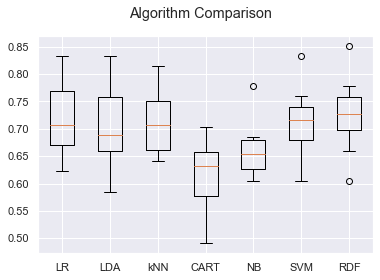

In [197]:
# Compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [70]:
from sklearn.metrics import roc_auc_score
RDF_Model = RandomForestClassifier()
RDF_Model.fit(X_train_processed, Y_train_enc)
RDF_Predict = RDF_Model.predict(X_validation_processed)
RDF_Accuracy = accuracy_score(Y_validation_enc, RDF_Predict)
print("Accuracy: " + str(RDF_Accuracy))

RDF_AUC = roc_auc_score(Y_validation_enc, RDF_Predict) 
print("AUC: " + str(RDF_AUC))

Accuracy: 0.6940298507462687
AUC: 0.6908584169453734


In [71]:
from sklearn.metrics import roc_auc_score
LR_Model = LogisticRegression(solver='liblinear')
LR_Model.fit(X_train_processed, Y_train_enc)
LR_Predict = LR_Model.predict(X_validation_processed)
LR_Accuracy = accuracy_score(Y_validation_enc, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(Y_validation_enc, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.6417910447761194
AUC: 0.6396878483835006


## XGBoost

In [72]:
from xgboost import XGBClassifier
# fit model on training data
model = XGBClassifier()
model.fit(X_train_processed, Y_train_enc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
# make predictions for test data
predictions = model.predict(X_validation_processed)
# evaluate predictions
accuracy = accuracy_score(Y_validation_enc, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.42%


the results show a tight distribution for RDF,SVM , CART and KNN which is encouraging, suggesting low variance. however, we notice outliers for CART. 

In [ ]:
# Standardize the dataset
#pipelines = []
#pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))])))
#pipelines.append(('ScaledLDA',Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
#pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
#pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(gamma='auto'))])))

#results = []
#names = []
#for name, model in pipelines:
#    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
#    cv_results = cross_val_score(model, X_train_processed,Y_train_enc, cv=kfold,scoring=scoring)
#    results.append(cv_results)
#    names.append(name)
#    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
#    print(msg)

# Algorithm Tuning

## Tuning KNN

In [74]:
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid=dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_processed, Y_train_enc)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.709015 using {'n_neighbors': 5}
0.656604 (0.043410) with: {'n_neighbors': 1}
0.675192 (0.042797) with: {'n_neighbors': 3}
0.709015 (0.037108) with: {'n_neighbors': 5}
0.699406 (0.059952) with: {'n_neighbors': 7}
0.693850 (0.055694) with: {'n_neighbors': 9}
0.697589 (0.059252) with: {'n_neighbors': 11}
0.690217 (0.053417) with: {'n_neighbors': 13}
0.671384 (0.057674) with: {'n_neighbors': 15}
0.686303 (0.073458) with: {'n_neighbors': 17}
0.671314 (0.069595) with: {'n_neighbors': 19}
0.673201 (0.067469) with: {'n_neighbors': 21}


## Tuning SVM

In [75]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_processed, Y_train_enc)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.714465 using {'C': 0.9, 'kernel': 'rbf'}
0.688085 (0.072650) with: {'C': 0.1, 'kernel': 'linear'}
0.558875 (0.097127) with: {'C': 0.1, 'kernel': 'poly'}
0.663802 (0.074296) with: {'C': 0.1, 'kernel': 'rbf'}
0.663836 (0.079867) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.699336 (0.069975) with: {'C': 0.3, 'kernel': 'linear'}
0.596401 (0.100549) with: {'C': 0.3, 'kernel': 'poly'}
0.686268 (0.059448) with: {'C': 0.3, 'kernel': 'rbf'}
0.613242 (0.063450) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.701223 (0.071142) with: {'C': 0.5, 'kernel': 'linear'}
0.618798 (0.092625) with: {'C': 0.5, 'kernel': 'poly'}
0.697519 (0.059666) with: {'C': 0.5, 'kernel': 'rbf'}
0.583403 (0.062751) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.699336 (0.071449) with: {'C': 0.7, 'kernel': 'linear'}
0.622502 (0.082013) with: {'C': 0.7, 'kernel': 'poly'}
0.714430 (0.057836) with: {'C': 0.7, 'kernel': 'rbf'}
0.581621 (0.065674) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.699336 (0.070482) with: {'C': 0.9, 'kernel': 'linear'

# Ensemble Methods

In [76]:
# ensemble
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_processed, Y_train_enc, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.695807 (0.073126)
GBM: 0.701433 (0.052682)
RF: 0.688400 (0.062845)
ET: 0.705381 (0.037834)


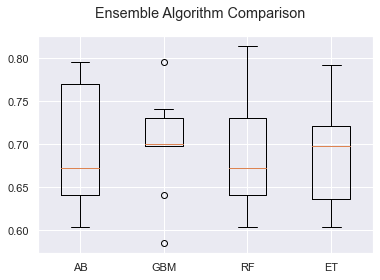

In [207]:
# compare Algorithms
fig=pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Finalize Model
The RandomForestClassifier showed the most promise model for this problem. We will finalize the model by training it on the entire training dataset and make predictions for the hold-out validation dataset to confirm our findings

In [77]:
model=RandomForestClassifier()
model.fit(X_train_processed,Y_train_enc)

#estimate accuracy on validation dataset
predictions=model.predict(X_validation_processed)
print(accuracy_score(Y_validation_enc,predictions))
print(confusion_matrix(Y_validation_enc,predictions))
print(classification_report(Y_validation_enc,predictions))

0.7014925373134329
[[39 26]
 [14 55]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        65
           1       0.68      0.80      0.73        69

    accuracy                           0.70       134
   macro avg       0.71      0.70      0.70       134
weighted avg       0.71      0.70      0.70       134

